**SIG 742 - End Term Group Assignment**

# New section

                                                      Deakin University
                                          SIG742 - End Term Group 18 Task Submission
                              Team Members:Lavanya Thiruvali Sunderarajan , Madhuchhanda Tripathy and Anand Venkateshwaran
                                          Student Id's: 223505089 , 223623621 and 223559856
                                              Group       : Group 18
                                              Date        : 08-10-2023
                                                    

**Instructions**

**Assignment Questions**
- There are total 2 parts in this assessment task:
- Part 1 The first part will focus on the data acquisition and manipulation which includes the numpy, the pandas, the Data Wrangling, the EDA from M03, and M04.
- Part 2 The second part will require to perform the time series analysis exercise, which includes the time series, the ARIMA, the Isolation Forest M05.


**What to Submit?**

- SIG742Task2.ipynb The completed notebook with all the run-able code for all requirements (part 1 and part2).
- In general, you (your group) need to complete, save the results of running, download/export the notebook as a local file, and submit your notebook from Python platform such as Google Colab. You need to clearly list the answer for each question, and the expected format from your notebook will be
like in Figure 1 (One notebook for each group).

**SIG742Task2report.pdf Report**

- You (group) are also required to put your answer (code) and running results
from SIG742Task2.ipynb into a pdf as the report for your task2 assignment (the code comments, and results including plot images are all required in the report, the code format such as Indentation should be same in the ipynb notebook).
- In this report (one for each group), you will also need to cover all the questions (Part 1 and Part
- And you will need to provide a clear explanation on your logic for solving each question (you could write explanation below your solution and results. In the explanation, you will need to cover
below parts:
 - 1). why you decide to choose your solution;
 - 2). are there any other solutions that could solve the question;
 - 3). whether your solution is the optimal or not? why? The length of the
explanation part for each question is limited below 100 words.
- In the end of your report, you also need to discuss below two points:
  - What you have learned with your team members from the second assignment.
  - What is the contribution of each team member for finishing the second assignment?

**SIG742Task2video.avi Video**

- A video demonstration between 10 and 15 minutes, and the file format can be
other common video formats, such as ‘MKV’, ‘WMV’, ‘MOV’ etc.
- For your group, one important submission is a short video in which each of You orally present the solutions that you provide in the notebook and illustrate the running of code line by line.
- In the video, your group need to work together to discuss below three points:
 - Which question(s) you have worked on and how did you collaborate with other team members.
 - What is the logic behind the your solution on the question(s) and is there any other optimized ways to resolve the question.
 - What is your understanding of Code collaboration? How do you collaborate with coding in your group? What are the common tools to support the Code collaboration?


**Part I**

**Data Acquisition and Manipulation**

- There are 10 questions in this part for total 60 marks, and each question is for 5 marks. The quality of your explanation in the report and video will be 10 marks for all questions.
- You are required to use Google Colab to finish all the coding in the code block cell, and provide sufficient coding comments, and also save the result of running as well.
- The (Item_listing_category.zip) data used for this part could be found in here. You will need to use Pandas to read the unzipped (csv) data for starting.


**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Code Explanation:**

- Mounting Google Drive

**Part I**

**Importing Libraries**

In [ ]:
# Importing Required Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as tsa
from matplotlib import pyplot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import seaborn as sns
from sklearn.ensemble import IsolationForest
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")

**Code Explanation:**

- Importing key packages required

**Question 1.1**

Find the missing values:
- Write the function missing_values_table and use the dataframe as the input. The function should return the information of missing values by column (only for columns which have missing values and the returned value should be the count of rows has missing values);
- For columns which have missing values, could you impute the missing values with themean value of the particular columns? (if you think it could not be done with mean value, write down the reason in comments and report rather than code)


**Solution 1.1**

**Loading Dataset**

In [ ]:
## Loading Dataset Using Pandas
df = pd.read_csv('/content/drive/MyDrive/Ass-2/item_listing_category.csv')
print(f"Shape Of Input Data : {df.shape[0]} Rows And {df.shape[1]} Columns" )

Shape Of Input Data : 355808 Rows And 8 Columns


**Code Explanation:**

Here's an explanation of the code:

- `pd.read_csv('item_listing_category.csv')`: This line of code uses the Pandas library to read a CSV file located at the specified path. The data is loaded into a DataFrame, which is a tabular data structure used in Pandas to work with structured data like CSV files.

- `print(f"Shape Of Input Data : {df.shape[0]} rows and {df.shape[1]} columns")`: This line of code prints the shape of the loaded DataFrame. df.shape returns a tuple where the first element is the number of rows, and the second element is the number of columns in the DataFrame. The f-string is used to format the output string with these values.

**Checking Sample Data**

In [ ]:
## Checking Sample Data
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,clean_description
0,128037,Bundle for Sassy Sisters,3,Women/Tops & Blouses/Blouse,NaN,16.0,0,max cleo black dress paper crane black tank to...
1,491755,PINK VS TANK,2,"Women/Tops & Blouses/Tank, Cami",NaN,17.0,0,sequin pink sign sequins missing gently worn
2,470924,Funko Pop Unmasked Cyclops,1,Kids/Toys/Action Figures & Statues,Funko,30.0,1,box great condition comes soft pop protector p...
3,491263,Baby Roshe Runs,3,Kids/Boys 2T-5T/Shoes,Nike,19.0,0,baby black nike roshe runs size 5c
4,836489,Baby Girl Ralph Lauren dresses,3,Kids/Girls 0-24 Mos/Dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355808 entries, 0 to 355807
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           355808 non-null  int64  
 1   name               355808 non-null  object 
 2   item_condition_id  355808 non-null  int64  
 3   category_name      354269 non-null  object 
 4   brand_name         203852 non-null  object 
 5   price              355808 non-null  float64
 6   shipping           355808 non-null  int64  
 7   clean_description  355614 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 21.7+ MB


**Function For Checking Null Values , Missing Values and Filtering Columns having Missing Values**

In [ ]:
# Function For Checking Null Values
def null_counter (df):

  # Using Pandas To Check The Frequency Of Missing Values In All Columns
  null_all = df.isnull().sum()

  # Filtering All Columns Where We Have Missing Values
  null_cols = null_all[null_all != 0]
  return null_cols

**Code Explanation:**

Here's an explanation of how the function works:

- `df.isnull()`: This part of the code creates a Boolean DataFrame where each element is `True` if the corresponding element in the original DataFrame df is NaN (missing) and `False` otherwise.

- `df.isnull().sum()`: This computes the sum of True values (which are treated as 1) for each column in the Boolean DataFrame. This effectively counts the number of missing values in each column.

- `null_all`: This variable stores a Pandas Series where the index represents column names, and the values represent the count of missing values in each column.

- `null_all[null_all != 0]`: This line filters the `null_all` Series to include only those columns where the count of missing values is not zero, indicating that they have missing data.

Finally, the function returns the null_cols Series, which contains the columns with missing values.

**Output**

In [ ]:
# Running Above Functions To Get The Desired Output
print(null_counter (df))

category_name          1539
brand_name           151956
clean_description       194
dtype: int64


**Missing value imputation with mean values**

- For the Current Data, Mean Imputation For Missing Value Treatment is not possible.

- All the three columns which have missing values are categorigal text variables and mean can only be calculated for a numeric data field.



**Question 1.2**

Find the price information from the data:
- Write code to print the median price of the items in the data;
- What is the 90th percentile value on the price;
- Draw the histogram chart for the price of the items in the data with 50 bins.


**Solution 1.2**

**Finding Median Price Of Items**

In [ ]:
# Finding Median Price Of Items Using Pandas
print(f"Median Price For Items Is: {df.price.median()}")

Median Price For Items Is: 17.0


**Code Explanation:**

Here's a breakdown of what the code does:

- `df.price.median()`: This part of the code uses the Pandas DataFrame df and its price column to calculate the median price of the items. The median() function is a Pandas method that computes the median of the values in the specified column.

- `print(f"Median Price For Items Is: {df.price.median()}")`: This part of the code prints the calculated median price within a formatted string. The  braces {} are placeholders for the value returned by df.price.median(), and it's included in the printed string with a label "Median Price For Items Is:".

**Finding 90th Percentile Value Of Price**

In [ ]:
# Finding 90th Percentile Value Of Price Using Pandas
print(f"90th Percentile Of Price Field Is: {df.price.quantile(0.9)}")

90th Percentile Of Price Field Is: 51.0


**Code Explanation:**

- `df.price.quantile(0.9)`: This part of the code uses the Pandas DataFrame df and its price column to calculate the 90th percentile value. The quantile() function is a Pandas method that computes the specified percentile of the values in the specified column. In this case, we've specified the 90th percentile by passing 0.9 as the argument.

- `print(f"90th Percentile Of Price Field Is: {df.price.quantile(0.9)}")`: This part of the code prints the calculated 90th percentile value within a formatted string.
- The braces {} are placeholders for the value returned by `df.price.quantile(0.9)`, and it's included in the printed string with a label "90th Percentile Of Price Field Is:".

array([[<Axes: title={'center': 'price'}>]], dtype=object)

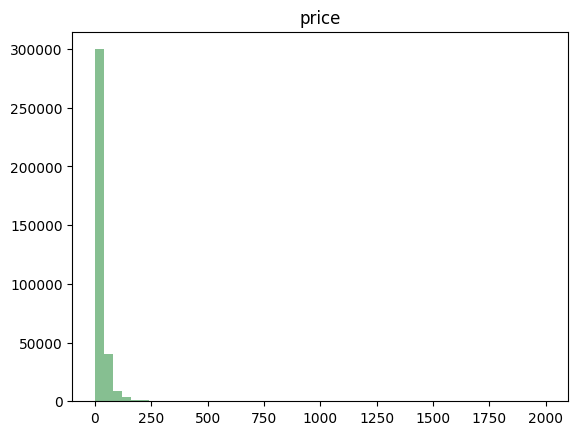

In [ ]:
## Drawing Histogram Of Price Of Items
df.hist(column='price', bins=50, grid=False, color='#86bf91')

**Code Explanation:**

- The code provided generates a histogram of the price column of the DataFrame df using the Pandas library.

- Here's what each part of the code does:

- `df.hist(column='price', bins=50, grid=False, color='#86bf91')`: This line of code calls the hist() function on DataFrame df to create a histogram. Here are the parameters used:
 - `column='price'`: This specifies the column in DataFrame that we want to create a histogram for, which is the price column in this case.
 - `bins=50`: This parameter specifies the number of bins or intervals into which the data will be divided for the histogram. In this case, it's set to 50, which means there will be 50 bars in the histogram.
 - `grid=False`: This parameter controls whether gridlines should be displayed on the histogram. Setting it to False means no gridlines will be shown.
 - `color='#86bf91'`: This parameter sets the color of the bars in the histogram. In this case, the color is set to '#86bf91', which is a shade of green.

**Observation**:

- The Above Plot is highly skewed to the left side.


**Let's Check Distribution Across All Bins**

In [ ]:
df['CountBin'] = pd.cut(df['price'], bins=50)
df['CountBin'].value_counts()

(-2.0, 40.0]        303676
(40.0, 80.0]         36786
(80.0, 120.0]         8011
(120.0, 160.0]        3346
(160.0, 200.0]        1544
(200.0, 240.0]         881
(240.0, 280.0]         476
(280.0, 320.0]         325
(320.0, 360.0]         227
(360.0, 400.0]         101
(400.0, 440.0]          75
(440.0, 480.0]          63
(480.0, 520.0]          62
(520.0, 560.0]          45
(680.0, 720.0]          28
(640.0, 680.0]          27
(600.0, 640.0]          25
(560.0, 600.0]          21
(760.0, 800.0]          15
(720.0, 760.0]          12
(800.0, 840.0]           8
(880.0, 920.0]           8
(840.0, 880.0]           5
(1040.0, 1080.0]         5
(1480.0, 1520.0]         3
(1240.0, 1280.0]         3
(1200.0, 1240.0]         3
(1000.0, 1040.0]         3
(1080.0, 1120.0]         3
(920.0, 960.0]           3
(960.0, 1000.0]          2
(1360.0, 1400.0]         2
(1880.0, 1920.0]         2
(1840.0, 1880.0]         2
(1800.0, 1840.0]         2
(1160.0, 1200.0]         2
(1600.0, 1640.0]         2
(

**Code Explanation:**

Here's a breakdown of what the code does:

- `df['CountBin'] = pd.cut(df['price'], bins=50)`: This line of code creates a new column named CountBin in DataFrame df. It uses the pd.cut() function to cut the price column into 50 bins. Each bin label represents the range of prices that fall within it.

- `df['CountBin'].value_counts()`: This line of code counts the occurrences of each bin label in the CountBin column. It essentially tells how many values from the price column fall into each of the 50 bins.

**Question 1.3**

Exploring the shipping information from the data:
- Write code to find out the percentage of the items that are paid by the buyers.
- Draw (two) histogram graphs in one plot on the price for seller pays shipping and buyer
pays shipping (50 bins).
- When buying the items online, do you need to pay higher price if seller pays for the shipping? Write the code to find out (Compare the median price of items paid by buyers and items paid by sellers, and explain the result in the comment and report).
- Optional: You could use the subplot from EDA


**Solution 1.3**

**Finding Percentage Of Items Where Shipping Is Paid By The Buyer**

In [ ]:
## Finding Percentage Of Items Where Shipping Is Paid By The Buyer
shipping_percent = round((len(df['shipping'][df['shipping']==0])/df.shape[0])*100,2)
print(f"Percentage Of Items With Shipping Charges Paid By Buyer: {shipping_percent} %")

Percentage Of Items With Shipping Charges Paid By Buyer: 55.38 %


**Code Explanation:**

Here's a breakdown of what the code does:

- When the value of the shipping column is 1, it paid for by the seller and when it is 0 it is not paid by the seller; it is paid by the buyer instead. `df['shipping'][df['shipping'] == 0]`: This part of the code filters the 'shipping' column in DataFrame df to select only the rows where the value in the 'shipping' column is equal to 0. This implies that we are selecting items where the shipping is paid by the buyer.

- `len(df['shipping'][df['shipping'] == 0])`: This part of the code calculates the number of items that meet the condition mentioned above.

- `df.shape[0]`: This retrieves the total number of rows in DataFrame, which represents the total number of items.

- `round((len(df['shipping'][df['shipping']==0])/df.shape[0])*100,2)`: This part of the code calculates the percentage of items with additional shipping charges paid by the buyer. It divides the number of items with buyer-paid shipping by the total number of items, then multiplies it by 100 to express it as a percentage, and rounds the result to 2 decimal places.

- `print(f"Percentage Of Items With Additional Shipping Charges: {shipping_percent} %")`: This line of code prints the calculated percentage within a formatted string.

- So, the final output will be a message indicating the percentage of items with additional shipping charges paid by the buyer.

In [ ]:
df1 = df[df['shipping']==0]
df1.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,clean_description,CountBin
0,128037,Bundle for Sassy Sisters,3,Women/Tops & Blouses/Blouse,NaN,16.0,0,max cleo black dress paper crane black tank to...,"(-2.0, 40.0]"
1,491755,PINK VS TANK,2,"Women/Tops & Blouses/Tank, Cami",NaN,17.0,0,sequin pink sign sequins missing gently worn,"(-2.0, 40.0]"
3,491263,Baby Roshe Runs,3,Kids/Boys 2T-5T/Shoes,Nike,19.0,0,baby black nike roshe runs size 5c,"(-2.0, 40.0]"
4,836489,Baby Girl Ralph Lauren dresses,3,Kids/Girls 0-24 Mos/Dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...,"(-2.0, 40.0]"
6,73349,Lodge Cast iron grill pan,1,Home/Kitchen & Dining/Cookware,Lodge,26.0,0,10 1 2 cast iron pan,"(-2.0, 40.0]"


**Code Explanation:**

The code provided creates a new DataFrame df1 that contains only the rows from the original DataFrame df where the 'shipping' column has a value of 0 (implying that the shipping is paid by the buyer).  

Here's a breakdown of what the code does:

- `df[df['shipping'] == 0]`: This part of the code filters the rows of the original DataFrame df to select only those where the 'shipping' column has a value of 0. This creates a new DataFrame, df1, containing only the rows where shipping is paid by the buyer.

- `df1.head()`: This part of the code displays the first few rows of the df1 DataFrame using the .head() method.

**Plotting Two Histograms As Sub Plot For Items With  Shipping Charges Paid By Seller And Items With  Shipping Charges Paid By Buyer**

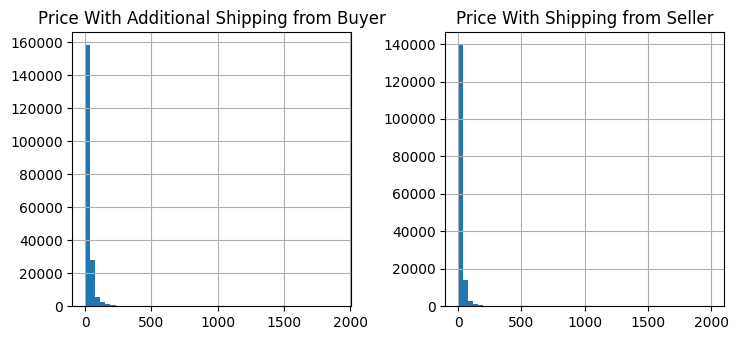

In [ ]:
## Plotting Two Histograms As Sub Plot For Items with  Shipping Charges paid by seller And Items with  Shipping Charges paid by buyer
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

df1 = df[df['shipping']==0]
df1.rename(columns={'price':'Price With Additional Shipping from Buyer'}, inplace=True)

df2 = df[df['shipping']==1]
df2.rename(columns={'price':'Price With Shipping from Seller'}, inplace=True)

fig, axes = plt.subplots(1, 2)

df1.hist('Price With Additional Shipping from Buyer', ax=axes[0], bins = 50)
df2.hist('Price With Shipping from Seller', ax=axes[1], bins = 50)

plt.show()

**Code Explanation:**

- The code plots two histograms as subplots, one for Items with  Shipping Charges paid by seller And another for Items with  Shipping Charges paid by buyer, separately.

- Here's a breakdown of what the code does:

- `plt.rcParams["figure.figsize"] = [7.50, 3.50] and plt.rcParams["figure.autolayout"] = True`: These lines set the figure size and enable figure autolayout for Matplotlib plots.

- `df1 = df[df['shipping']==0]` and `df2 = df[df['shipping']==1]`: These lines create two new DataFrames, df1 and df2, by filtering the original DataFrame df. df1 contains rows where the 'shipping' column is equal to 0 (items with shipping charges paid by buyer), and df2 contains rows where the 'shipping' column is equal to 1 (items with shipping charges paid by seller).

- `df1.rename(columns={'price':'Price With Additional  Shipping from Buyer'}, inplace=True)` and `df2.rename(columns={'price':'Price With Shipping from Seller'}, inplace=True)`: These lines rename the 'price' column in df1 and df2 to 'Price With Additional  Shipping from Buyer' and 'Price With Shipping from Seller', respectively, to make it clear which dataset each column represents.

- `fig, axes = plt.subplots(1, 2)`: This line creates a figure with two subplots arranged in a single row (1 row and 2 columns). The fig variable represents the entire figure, and axes is a list containing the axes of the two subplots.

- `df1.hist('Price With Additional  Shipping from Buyer', ax=axes[0], bins=50)`: This line creates a histogram for the 'Price With Additional  Shipping from Buyer' column in df1 and plots it on the first subplot (axes[0]) with 50 bins.

- `df2.hist('Price With Shipping from Seller', ax=axes[1], bins=50)`: This line creates a histogram for the 'Price With Shipping from Seller' column in df2 and plots it on the second subplot (axes[1]) with 50 bins.

- `plt.show()`: This line displays the figure with the two subplots.

- The result is a single figure with two histograms, one for the Price With Additional  Shipping from Buyer and the other for Price With Shipping from Seller, displayed side by side.

**Testing The Hypothesis On Higher Prices Being Charged For Items Without Shipping**

In [ ]:
## Testing The Hypothesis On Higher Prices Being Charged For Items Without Shipping
mean_price_shipping_buyer = round(df1['Price With Additional Shipping from Buyer'].mean(),2)
mean_price_shipping_seller = round(df2['Price With Shipping from Seller'].mean(),2)

print(f"Mean Price Of Items With Additional Shipping from Buyer: {mean_price_shipping_buyer}")
print(f"Mean Price Of Items With Shipping from Seller: {mean_price_shipping_seller}")

print(f"We Can Clearly See That The Average Price Is approximately {round(mean_price_shipping_buyer-mean_price_shipping_seller,0)} Dollars Higher For Items With Shipping Charges From Buyer")

Mean Price Of Items With Additional Shipping from Buyer: 29.97
Mean Price Of Items With Shipping from Seller: 22.56
We Can Clearly See That The Average Price Is approximately 7.0 Dollars Higher For Items With Shipping Charges From Buyer


**Code Explanation:**

- The code is testing a hypothesis about whether higher prices are being charged for items without shipping compared to items with additional shipping charges.

- Here's a breakdown of what the code does:

- `mean_price_shipping_buyer = round(df1['Price With Additional Shipping from Buyer'].mean(),2)`: This line calculates the mean (average) price of items with shipping charges paid by buyer in the df1 DataFrame and rounds the result to two decimal places. It stores the result in the mean_price_shipping_buyer variable.

- `mean_price_shipping_seller = round(df2['Price With Shipping from Seller'].mean(),2)`: This line calculates the mean price of items with shipping charges paid by seller in the df2 DataFrame and rounds the result to two decimal places. It stores the result in the mean_price_shipping_seller variable.

- `print(f"Mean Price Of Items With Additional Shipping from Buyer: {mean_price_shipping_buyer}")` and `print(f"Mean Price Of Items With Shipping from Seller: {mean_price_shipping_seller}")`: These lines print the mean prices of items where shipping charges are paid by buyer and seller, respectively.

- `print(f"We Can Clearly See That The Average Price Is approximately {round(mean_price_shipping_buyer-mean_price_shipping_seller,0)} Dollars Higher For Items With Shipping Charges from buyer")`: This line calculates the difference between the mean price of items with shipping charges from buyer (mean_price_shipping_buyer) and the mean price of items with shipping charges from seller (mean_price_shipping_seller). It rounds the difference to the nearest whole number and prints a statement indicating that the average price is approximately that much higher for items withshipping from buyer.

- This code is useful for comparing the average prices of items with shipping from buyer and seller, and making a statement about the difference in prices between the two categories.

**Question 1.4**

- You are required to find out the item condition information from the data. Lower the number (value), the better condition of the item.
- Write the code to find out (print) the count of the rows on each number (value) in column item_condition_id.
- Draw the boxplot graphs (one plot) on the price for each item condition value, and find out out whether the better condition of the item could have higher median price (draw the plot and answer this question in the comment and report).

**Solution 1.4**

**Checking Frequency Of Items Based On The Item Condition**

In [ ]:
## Checking Frequency Of Items Based On The Item Condition
df['item_condition_id'].value_counts()

1    153402
3    104248
2     89843
4      7768
5       547
Name: item_condition_id, dtype: int64

**Code Explanation:**

Here's what the code does:

- `df['item_condition_id']`: This part of the code selects the `'item_condition_id'` column from DataFrame df.

- `.value_counts()`: This is a Pandas method that counts the number of occurrences of each unique value in the selected column. In this case, it counts how many items belong to each item condition.

- It will output a Series that shows the frequency of items for each unique item condition.

**Plotting Box Plot For Item Price Based On Item Condition**

<Axes: >

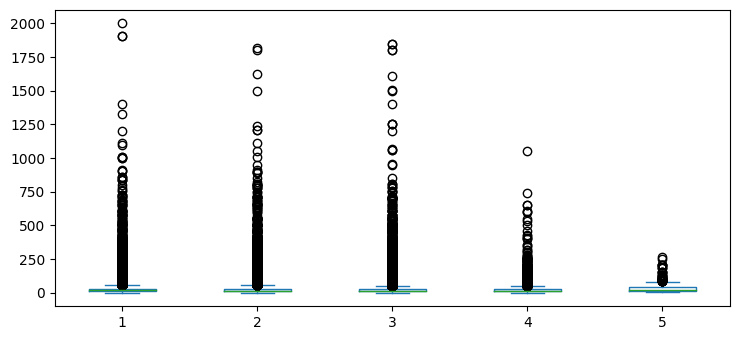

In [ ]:
## Plotting Box Plot For Item Price Based On Item Condition
df.assign(index=df.groupby('item_condition_id').cumcount()).pivot('index',
                                                                  'item_condition_id',
                                                                  'price').plot(kind='box')

**Code Explanation:**

- The code provided plots a box plot for item prices based on item condition using Pandas and Matplotlib.

- Here's a breakdown of what the code does:

- `df.assign(index=df.groupby('item_condition_id').cumcount())`: This part of the code assigns value to the `index` column by grouping the DataFrame by `'item_condition_id'` and then using `cumcount()` to assign a unique index within each group. This will be used as the x-axis of the box plot to separate data points by item condition.

- `.pivot('index', 'item_condition_id', 'price')`: This part of the code pivots the DataFrame, essentially reshaping it so that the 'index' values become the x-axis, 'item_condition_id' values become the categories (grouped by item condition), and 'price' values become the data points to be plotted.

- `.plot(kind='box')`: This line of code generates a box plot from the pivoted DataFrame. The `kind='box'` parameter specifies to create a box plot.

- When we run this code, it will produce a box plot with `'item_condition_id'` on the x-axis and item prices on the y-axis.

- Each box represents the distribution of item prices for a specific item condition.

- The box plot helps visualize the central tendency, spread, and potential outliers in item prices for each condition.

**Median Price Based On Item Condition**

In [ ]:
## Median Price Based On Item Condition
df.groupby('item_condition_id')['price'].median()

item_condition_id
1    18.0
2    17.0
3    16.0
4    15.0
5    19.0
Name: price, dtype: float64

**Code Explanation:**

- The code  provided calculates the median price for each item condition in the DataFrame df.

- Here's a breakdown of what the code does:

- `df.groupby('item_condition_id')`: This part of the code groups the DataFrame df by the `'item_condition_id'` column, creating separate groups for each unique item condition.

- `['price'].median()`: This part of the code applies the `.median()` function to each group of item conditions to calculate the median price within each group. Specifically, it calculates the median of the `'price'` column for each item condition.

- When we run this code, it will output a Series that shows the median price for each unique item condition.

**Observation**:

- The trend of decreasing price is applicable for majority of the items where median price is coming down with detoriation in item condition.

- The trend of price dip is breaking only for items with worst condition (item_condition_id = 5) but the category covers only 0.15% of items.

- Based on above findings, we can see better condition items having higher prices.

**Question 1.5**
- Conduct the category analysis and find out the relevant information:
-  Write the code to find out (print) how many unique categories you could find from column category_name.
- For the items with worst condition only (highest value from item_condition_id), write code to (print) find out the top 3 categories (now you probably understand the findings you had in Question 1.4).


**Solution 1.5**

**Getting Count Of Unique Item Categories**

In [ ]:
## Getting Count Of Unique Item Categories
print(f"Unique Categories In Dataset: {df['category_name'].nunique()}")

Unique Categories In Dataset: 1135


**Code Explanation:**

- The code provided calculates and prints the count of unique item categories in the DataFrame df.

- Here's a breakdown of what the code does:

- `df['category_name']`: This part of the code selects the `'category_name'` column from DataFrame df.

- `.nunique()`: This method is applied to the selected `'category_name'` column to count the number of unique categories within that column.

**Identify Top Three Categories For The Worst Condition Items**

In [ ]:
## We Want To Identify Top Three Categories For The Worst Condition Items
# Subset DataFrame For Worst Condition Items
df_worst_items = df[df['item_condition_id']==5]
# Check Count Of Items Against Each Category And Print Top 3 Categories Based On Volume
df_worst_items['category_name'].value_counts().head(3)

Electronics/Cell Phones & Accessories/Cell Phones & Smartphones    137
Electronics/Video Games & Consoles/Games                            42
Electronics/Video Games & Consoles/Consoles                         35
Name: category_name, dtype: int64

**Code Explanation:**

- The code provided identifies the top three categories for the worst condition items in DataFrame df.

- Here's a breakdown of what the code does:

- `df[df['item_condition_id']==5]`: This line of code creates a new DataFrame called df_worst_items by filtering the original DataFrame df to select only those rows where the `'item_condition_id'` is equal to 5, representing the worst condition items.

- `df_worst_items['category_name'].value_counts()`: This part of the code counts the occurrences of each unique item category within the df_worst_items DataFrame. It essentially counts how many items in the worst condition belong to each category.

- `.head(3)`: This method selects the top three categories with the highest item counts.

- When we run this code, it will output a Series that shows the top three categories for the worst condition items based on item count.

**Observation**:

- As we see major volume of worst condition items are electronic items which have higher prices and hence the median price was coming higher compared to the remaining groups based on condition.

**Question 1.6**

- The categories in column category_name have 3 parts. The three parts (main_cat,subcat_1 and subcat_2) are concatenated with ’/’ character sequentially in the data now.
- Write the function (must be function) to split the text content (string value in each row) in column category_name by ’/’ character. you need to handle the exception in the function for those has missing values (NaN). For missing values (NaN), the results from splitting should be ”Category Unknown”, ”Category Unknown”, ”Category Unknown”.
- Use the above function you wrote to create three new columns main_cat,subcat_1 andsubcat_2 with corresponding values from the result of splitting.
- Print out the dataframe to show the top 5 rows for three new columns main_cat,subcat_1 and subcat_2.


**Solution 1.6**

**Function To Split Categories**

In [ ]:
# Function To Split Categories Into Three Components As Main Category,
# Sub Category 1 And Sub Category 2
def category_split (x):
  try:
    x_split = x.split('/')
    main_cat = x_split[0]
    sub_cat1 = x_split[1]
    sub_cat2 = x_split[2]
  except:
    main_cat = sub_cat1 = sub_cat2 = 'Category Unknown'
  return main_cat, sub_cat1, sub_cat2

**Code Explanation:**

- The code provided defines a function called category_split that takes a single argument x, which is expected to be a string containing a category in a specific format (e.g., "Main Category/Sub Category 1/Sub Category 2").

- The function splits this input string into three components: main category, sub-category 1, and sub-category 2, and returns these components as a tuple.

- Here's a breakdown of what the code does:

- `x_split = x.split('/')`: This line splits the input string x using the '/' character as a delimiter. The result is a list of strings where each element corresponds to a part of the category hierarchy.

- `main_cat = x_split[0], sub_cat1 = x_split[1], sub_cat2 = x_split[2]`: These lines extract the individual components of the category from the `x_split` list. `main_cat` corresponds to the first element (main category), `sub_cat1` corresponds to the second element (sub-category 1), and `sub_cat2` corresponds to the third element (sub-category 2).

- The try and except blocks are used to handle cases where the input string `x` does not contain all three components separated by `'/'`. In such cases, it assigns the values 'Category Unknown' to all three components.

- Finally, the function returns a tuple containing the main category, sub-category 1, and sub-category 2.

**Applying Above Declared Function To Generate Three New Columns**

In [ ]:
## Applying Above Declared Function To Generate Three New Columns
df['main_cat'] = df.apply(lambda x: category_split(x['category_name'])[0], axis=1)
df['subcat_1'] = df.apply(lambda x: category_split(x['category_name'])[1], axis=1)
df['subcat_2'] = df.apply(lambda x: category_split(x['category_name'])[2], axis=1)
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,clean_description,CountBin,main_cat,subcat_1,subcat_2
0,128037,Bundle for Sassy Sisters,3,Women/Tops & Blouses/Blouse,NaN,16.0,0,max cleo black dress paper crane black tank to...,"(-2.0, 40.0]",Women,Tops & Blouses,Blouse
1,491755,PINK VS TANK,2,"Women/Tops & Blouses/Tank, Cami",NaN,17.0,0,sequin pink sign sequins missing gently worn,"(-2.0, 40.0]",Women,Tops & Blouses,"Tank, Cami"
2,470924,Funko Pop Unmasked Cyclops,1,Kids/Toys/Action Figures & Statues,Funko,30.0,1,box great condition comes soft pop protector p...,"(-2.0, 40.0]",Kids,Toys,Action Figures & Statues
3,491263,Baby Roshe Runs,3,Kids/Boys 2T-5T/Shoes,Nike,19.0,0,baby black nike roshe runs size 5c,"(-2.0, 40.0]",Kids,Boys 2T-5T,Shoes
4,836489,Baby Girl Ralph Lauren dresses,3,Kids/Girls 0-24 Mos/Dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...,"(-2.0, 40.0]",Kids,Girls 0-24 Mos,Dresses


**Code Explanation:**

- The code provided applies the category_split function to generate three new columns in DataFrame df: 'main_cat', 'subcat_1', and 'subcat_2'.

- Here's a breakdown of what the code does:

- `df['main_cat'] = df.apply(lambda x: category_split(x['category_name'])[0], axis=1)`: This line creates a new column called `'main_cat'` in DataFrame df. It uses the `apply()` function to apply the category_split function to each row of the `'category_name'` column and extracts the first component (main category) from the returned tuple.

- `df['subcat_1'] = df.apply(lambda x: category_split(x['category_name'])[1], axis=1)`: This line creates a new column called `'subcat_1'` in DataFrame df. It applies the `category_split` function to each row of the `'category_name'` column and extracts the second component (sub-category 1) from the returned tuple.

- `df['subcat_2'] = df.apply(lambda x: category_split(x['category_name'])[2], axis=1)`: This line creates a new column called `'subcat_2'` in DataFrame df. It applies the `category_split` function to each row of the `'category_name'` column and extracts the third component (sub-category 2) from the returned tuple.

- `df.head()`: This code displays the first few rows of the modified DataFrame to show the newly added columns.

- As a result, the DataFrame df will now have three additional columns ('main_cat', 'subcat_1', and 'subcat_2') that contain the respective components of the category strings.

**Question 1.7**

- After splitting the category for column category_name, we now have the three main details regarding to the category information. However, we need to clean the text in each of the new three columns in lowercase.
- Write code (or function) to change the text (value in each row) from the new three columns to lowercase.
- Draw the bar chart to find out the top 5 most popular main categories (in column main_cat) in the data (only showing the top 5).
- Write code (or function) to (print) find out how many unique main categories (in column main_cat), unique first sub-categories (in column subcat_1) and unique second sub-categories (in column subcat_2) respectively.


**Solution 1.7**

**Changing All New Category Columns To LowerCase**

In [ ]:
## Changing All New Category Columns To LowerCase
df['main_cat'] = df['main_cat'].str.lower()
df['subcat_1'] = df['subcat_1'].str.lower()
df['subcat_2'] = df['subcat_2'].str.lower()
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,clean_description,CountBin,main_cat,subcat_1,subcat_2
0,128037,Bundle for Sassy Sisters,3,Women/Tops & Blouses/Blouse,NaN,16.0,0,max cleo black dress paper crane black tank to...,"(-2.0, 40.0]",women,tops & blouses,blouse
1,491755,PINK VS TANK,2,"Women/Tops & Blouses/Tank, Cami",NaN,17.0,0,sequin pink sign sequins missing gently worn,"(-2.0, 40.0]",women,tops & blouses,"tank, cami"
2,470924,Funko Pop Unmasked Cyclops,1,Kids/Toys/Action Figures & Statues,Funko,30.0,1,box great condition comes soft pop protector p...,"(-2.0, 40.0]",kids,toys,action figures & statues
3,491263,Baby Roshe Runs,3,Kids/Boys 2T-5T/Shoes,Nike,19.0,0,baby black nike roshe runs size 5c,"(-2.0, 40.0]",kids,boys 2t-5t,shoes
4,836489,Baby Girl Ralph Lauren dresses,3,Kids/Girls 0-24 Mos/Dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...,"(-2.0, 40.0]",kids,girls 0-24 mos,dresses


**Code Explanation:**

- The code provided changes all the values in the new category columns 'main_cat', 'subcat_1', and 'subcat_2' to lowercase in DataFrame df.

- Here's a breakdown of what the code does:

- `df['main_cat'] = df['main_cat'].str.lower()`: This line uses the .str.lower() method to convert all values in the 'main_cat' column to lowercase.

- `df['subcat_1'] = df['subcat_1'].str.lower()`: This line does the same for the 'subcat_1' column.

- `df['subcat_2'] = df['subcat_2'].str.lower()`: This line does the same for the 'subcat_2' column.

- `df.head()`: This code displays the first few rows of the modified DataFrame to show that the values in the new category columns have been converted to lowercase.

- As a result, all the values in the 'main_cat', 'subcat_1', and 'subcat_2' columns will now be in lowercase.

**Plotting Bar Chart For Top 5 Categories**

<Axes: >

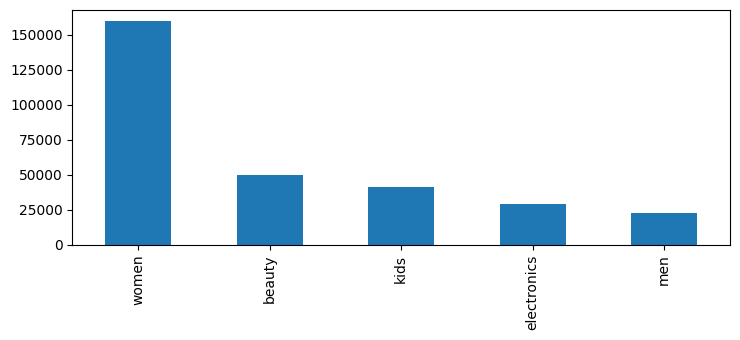

In [ ]:
## Plotting Bar Chart For Top 5 Categories
fig, ax = plt.subplots()
df['main_cat'].value_counts()[:5].plot(ax=ax, kind='bar')

**Code Explanation:**

Here's a breakdown of what the code does:

- `fig, ax = plt.subplots()`: This line creates a figure (fig) and an axis (ax) for the plot. Use ax to customize and display the bar chart.

- `df['main_cat'].value_counts()[:5]`: This part of the code counts the occurrences of each unique value in the 'main_cat' column using `.value_counts()`. The `[:5]` at the end selects only the top 5 categories with the highest counts.

- `.plot(ax=ax, kind='bar')`: This line plots the top 5 categories as a bar chart using the specified axis (ax) and chart type ('bar').

**Getting Count Of Unique Main Categories, Sub Category 1 And Sub Category 2**

In [ ]:
## Getting Count Of Unique Main Categories, Sub Category 1 And Sub Category 2
print(f"Unique Main Categories In Data: {df['main_cat'].nunique()}")
print(f"Unique First Sub-Categories In Data: {df['subcat_1'].nunique()}")
print(f"Unique Second Sub-Categories In Data: {df['subcat_2'].nunique()}")

Unique Main Categories In Data: 11
Unique First Sub-Categories In Data: 114
Unique Second Sub-Categories In Data: 788


**Code Explanation:**

Here's a breakdown of what the code does:

- `df['main_cat'].nunique()`: This line calculates the number of unique values in the 'main_cat' column, representing the count of unique main categories in  dataset.

- `df['subcat_1'].nunique()`: This line calculates the number of unique values in the 'subcat_1' column, representing the count of unique first-level sub-categories in dataset.

- `df['subcat_2'].nunique()`: This line calculates the number of unique values in the 'subcat_2' column, representing the count of unique second-level sub-categories in dataset.

- It will output three messages indicating the count of unique main categories, first-level sub-categories, and second-level sub-categories in the data, respectively.

**Question 1.8**

- Exploring the price and categories.
- Write code to (print) find out the median price for all the categories in new column main_cat.
- Draw the bar chart to find out the top 10 most expensive first sub-categories (in column subcat_1) in the data.
- Draw the bar chart to find out the top 10 cheapest second sub-categories (in column subcat_2) in the data.

**Solution 1.8**

**Getting Median Price For All Main Categories**

In [ ]:
## Getting Median Price For All Main Categories
df.groupby('main_cat')['price'].median()

main_cat
beauty                    15.0
category unknown          18.0
electronics               15.0
handmade                  12.0
home                      18.0
kids                      14.0
men                       21.0
other                     14.0
sports & outdoors         16.0
vintage & collectibles    16.0
women                     19.0
Name: price, dtype: float64

**Code Explanation:**

- Here's a breakdown of what the code does:

- `df.groupby('main_cat')`: This part of the code groups  DataFrame df by the 'main_cat' column, creating separate groups for each unique main category.

- `['price'].median()`: This part of the code applies the .median() function to each group of main categories to calculate the median price within each group. Specifically, it calculates the median of the 'price' column for each main category.

- It will output a Series that shows the median price for each unique main category

**Bar Chart For Top 10 Expensive First Sub-Categories**

<Axes: xlabel='subcat_1'>

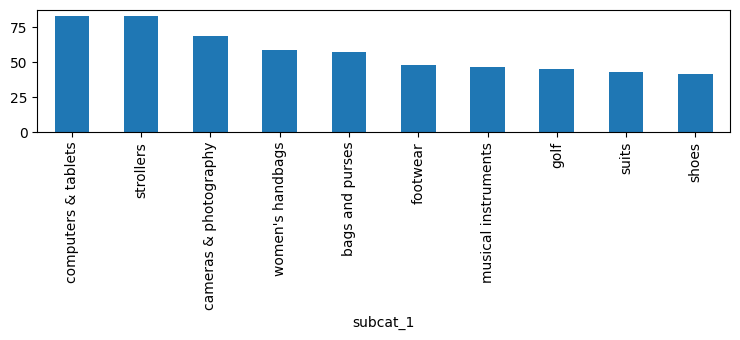

In [ ]:
## Bar Chart For Top 10 Expensive First Sub-Categories -
# Using Mean Of Price To Define Expensive V/s Cheap

fig, ax = plt.subplots()
df.groupby('subcat_1')['price'].mean().sort_values(ascending=False)[:10].plot(ax=ax, kind='bar')

**Code Explanation:**

- Here's a breakdown of what the code does:

- `fig, ax = plt.subplots()`: This line creates a figure (fig) and an axis (ax) for the plot. Use ax to customize and display the bar chart.

- `df.groupby('subcat_1')['price'].mean()`: This part of the code groups  DataFrame df by the 'subcat_1' column, creating separate groups for each unique first-level sub-category. It then calculates the mean price for each sub-category within those groups.

- `.sort_values(ascending=False)`: This method sorts the mean prices in descending order, so the most expensive sub-categories appear at the top.

- `[:10]`: This part of the code selects the top 10 sub-categories with the highest mean prices.

- `.plot(ax=ax, kind='bar')`: This line plots the top 10 expensive first-level sub-categories as a bar chart using the specified axis (ax) and chart type `('bar')`.

- It will generate a bar chart showing the top 10 expensive first-level sub-categories based on the mean price of items in each sub-category. The x-axis will represent the sub-categories, and the y-axis will represent the mean prices.

**Bar Chart For Top 10 Cheap Second Sub-Categories**

<Axes: xlabel='subcat_2'>

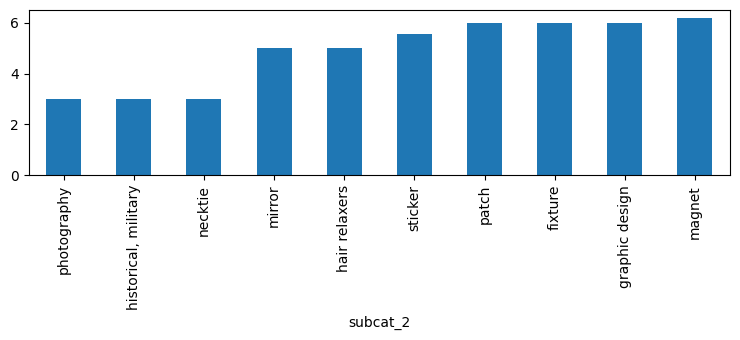

In [ ]:
## Bar Chart For Top 10 Cheap Second Sub-Categories -
# Using Mean Of Price To Define Expensive V/s Cheap

fig, ax = plt.subplots()
df.groupby('subcat_2')['price'].mean().sort_values()[:10].plot(ax=ax, kind='bar')

**Code Explanation:**

- Here's a breakdown of what the code does:

- `fig, ax = plt.subplots()`: This line creates a figure (fig) and an axis (ax) for the plot. Use ax to customize and display the bar chart.

- `df.groupby('subcat_2')['price'].mean()`: This part of the code groups  DataFrame df by the 'subcat_2' column, creating separate groups for each unique second-level sub-category. It then calculates the mean price for each sub-category within those groups.

- `.sort_values()`: This method sorts the mean prices in ascending order, so the cheapest sub-categories appear at the top.

- `[:10]`: This part of the code selects the top 10 sub-categories with the lowest mean prices (i.e., the cheapest).

- `.plot(ax=ax, kind='bar')`: This line plots the top 10 cheap second-level sub-categories as a bar chart using the specified axis (ax) and chart type ('bar').

- It will generate a bar chart showing the top 10 cheap second-level sub-categories based on the mean price of items in each sub-category. The x-axis will represent the sub-categories, and the y-axis will represent the mean prices.

**Question 1.9**
- Exploring the price and brand.
- Write code to (print) find out the median price for all the brands (fill NaN with’brand unavailable’).
- Draw the bar chart to find out the top 10 most popular brands in the data.


**Solution 1.9**

**Replacing NaN In Brands With 'Brand Unavailable**

In [ ]:
## Replacing NaN In Brands With 'Brand Unavailable'
df.brand_name.fillna('Brand Unavailable', inplace=True)
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,clean_description,CountBin,main_cat,subcat_1,subcat_2
0,128037,Bundle for Sassy Sisters,3,Women/Tops & Blouses/Blouse,Brand Unavailable,16.0,0,max cleo black dress paper crane black tank to...,"(-2.0, 40.0]",women,tops & blouses,blouse
1,491755,PINK VS TANK,2,"Women/Tops & Blouses/Tank, Cami",Brand Unavailable,17.0,0,sequin pink sign sequins missing gently worn,"(-2.0, 40.0]",women,tops & blouses,"tank, cami"
2,470924,Funko Pop Unmasked Cyclops,1,Kids/Toys/Action Figures & Statues,Funko,30.0,1,box great condition comes soft pop protector p...,"(-2.0, 40.0]",kids,toys,action figures & statues
3,491263,Baby Roshe Runs,3,Kids/Boys 2T-5T/Shoes,Nike,19.0,0,baby black nike roshe runs size 5c,"(-2.0, 40.0]",kids,boys 2t-5t,shoes
4,836489,Baby Girl Ralph Lauren dresses,3,Kids/Girls 0-24 Mos/Dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...,"(-2.0, 40.0]",kids,girls 0-24 mos,dresses


**Code Explanation:**

- The code replaces NaN values in the 'brand_name' column of DataFrame df with the string 'Brand Unavailable'.

- Here's a breakdown of what the code does:

- `df.brand_name.fillna('Brand Unavailable')`: This line uses the `fillna()` method to replace missing (NaN) values in the 'brand_name' column with the string 'Brand Unavailable'.

- `inplace=True`: This parameter is set to True, which means that the change is applied directly to the DataFrame df, and there's no need to assign the result back to df.

- `df.head()`: This code displays the first few rows of the modified DataFrame to show that the NaN values in the 'brand_name' column have been replaced with 'Brand Unavailable'.

- As a result, any rows in the DataFrame where the `'brand_name'` was originally missing (NaN) will now have `'Brand Unavailable'` in that column.

**Printing Median Price For All Brands**

In [ ]:
## Printing Median Price For All Brands
print(df.groupby('brand_name')['price'].median())

brand_name
% Pure               14.0
10.Deep              18.0
21men                10.0
3.1 Phillip Lim     232.5
3M®                  15.0
                    ...  
timi & leslie        65.0
tokidoki             18.0
totes ISOTONER       14.0
triangl swimwear     44.0
vineyard vines       21.0
Name: price, Length: 3047, dtype: float64


**Code Explanation:**

- Here's a breakdown of what the code does:

- `df.groupby('brand_name')`: This part of the code groups DataFrame df by the 'brand_name' column, creating separate groups for each unique brand.

- `['price'].median()`: This part of the code applies the `.median()` function to each group of brands to calculate the median price within each group. Specifically, it calculates the median of the 'price' column for each brand.

- `print(df.groupby('brand_name')['price'].median())`: This code prints the calculated median prices for each brand.

- It will output a Series that shows the median price for each unique brand. The result will list each brand's name along with its corresponding median price.

<Axes: >

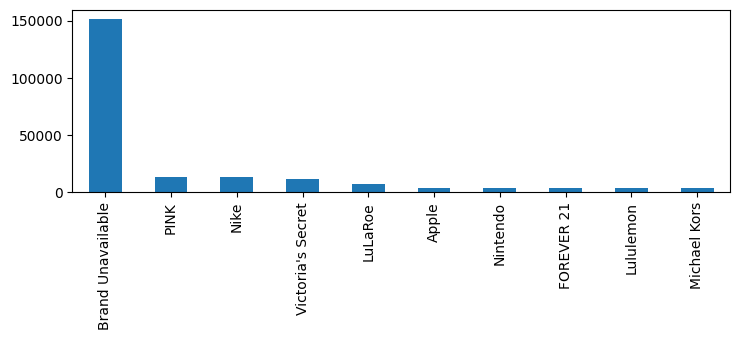

In [ ]:
## Plotting Bar Chart For 10 Most Popular Brands (Defined Based On Occurence Frequency In Data)
fig, ax = plt.subplots()
df['brand_name'].value_counts()[:10].plot(ax=ax, kind='bar')

**Code Explanation:**

- The code creates a bar chart for the 10 most popular brands in DataFrame df based on the frequency of occurrence of each brand in the data.

- Here's a breakdown of what the code does:

- `fig, ax = plt.subplots()`: This line creates a figure (fig) and an axis (ax) for the plot. Use ax to customize and display the bar chart.

- `df['brand_name'].value_counts()`: This part of the code counts the occurrences of each unique brand name in the `'brand_name'` column using `.value_counts()`.

- `[:10]`: This part of the code selects the top 10 brands with the highest occurrence frequencies.

- `.plot(ax=ax, kind='bar')`: This line plots the top 10 most popular brands as a bar chart using the specified axis (ax) and chart type ('bar').

- It will generate a bar chart showing the 10 most popular brands based on how frequently they appear in the 'brand_name' column of  DataFrame df. The x-axis will represent the brand names, and the y-axis will represent the frequency of occurrence.

**Subsetting Data To Remove 'Brand Unavailable' From Plot**

<Axes: >

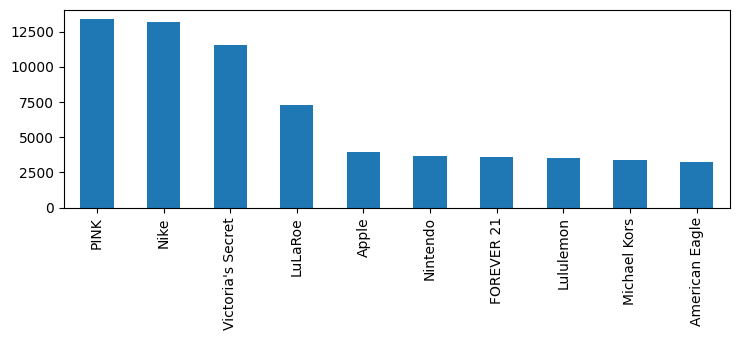

In [ ]:
## Subsetting Data To Remove 'Brand Unavailable' From Plot
df_brands_present = df[df['brand_name'] != 'Brand Unavailable']
fig, ax = plt.subplots()
df_brands_present['brand_name'].value_counts()[:10].plot(ax=ax, kind='bar')

**Code Explanation:**

- The code subsets data to remove rows where the 'brand_name' is 'Brand Unavailable' and then creates a bar chart for the 10 most popular brands among the remaining data.

- Here's a breakdown of what the code does:

- `df[df['brand_name'] != 'Brand Unavailable']`: This line creates a new DataFrame called df_brands_present by filtering the original DataFrame df to select only those rows where the 'brand_name' is not equal to 'Brand Unavailable'. This effectively removes rows with 'Brand Unavailable' from the data.

- `fig, ax = plt.subplots()`: This line creates a figure (fig) and an axis (ax) for the plot. Use ax to customize and display the bar chart.

- `df_brands_present['brand_name'].value_counts()`: This part of the code counts the occurrences of each unique brand name in the 'brand_name' column of the df_brands_present DataFrame using `.value_counts()`.

- `[:10]`: This part of the code selects the top 10 brands with the highest occurrence frequencies among the remaining data.

- `.plot(ax=ax, kind='bar')`: This line plots the top 10 most popular brands (excluding 'Brand Unavailable') as a bar chart using the specified axis (ax) and chart type ('bar').

- It will generate a bar chart showing the 10 most popular brands among the items where the brand name is available and not equal to 'Brand Unavailable'. The x-axis will represent the brand names, and the y-axis will represent the frequency of occurrence.

**Question 1.10**
- Item Description Analysis.
- Could you draw the wordcloud chart by using the column clean_description.
- Divide the data with quantiles of the price (using qcut from pandas to obtain the first/second/third/fourth quantile).
- Draw the wordcould by using the column clean_description on each quantile of price data.

**Solution 1.10**

**Generating Word Cloud Based On Clean_Description Field**

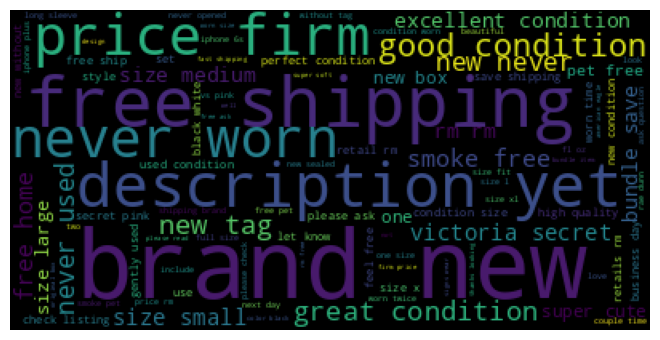

In [ ]:
## Generating Word Cloud Based On Clean_Description Field

# First We Need To Combine Entire Field Into A Text
# Replacing NaN With Empty String
df.clean_description.fillna('', inplace=True)
text = ' '.join(df['clean_description'])
wordcloud2 = WordCloud().generate(text)
# Generate Plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

**Code Explanation:**

- We're generating a word cloud based on the 'clean_description' field in the DataFrame df.

- Here's a breakdown of what the code does:

- `df.clean_description.fillna('', inplace=True)`: This line replaces any NaN values in the 'clean_description' column with empty strings, ensuring that we have text data for all rows.

- `text = ' '.join(df['clean_description'])`: This line concatenates all the text in the 'clean_description' column into a single string called 'text' with spaces separating each item's description.

- `wordcloud2 = WordCloud().generate(text)`: This line generates a word cloud using the WordCloud library based on the 'text' data we've concatenated. The generate() function creates the word cloud.

- `plt.imshow(wordcloud2)`: This code displays the word cloud using Matplotlib's imshow() function.

- `plt.axis("off")`: This line removes the axis labels and ticks from the plot for a cleaner visualization.

- `plt.show()`: This code displays the generated word cloud.

- It will create and display a word cloud based on the text data from the 'clean_description' field. The word cloud visually represents the most frequent words in the descriptions, with the size of each word indicating its relative frequency in the text.

In [ ]:
## Splitting Data Into Four Quantiles Based On Price
price_quantiles = ['1st_Quantile', '2nd_Quantile', '3rd_Quantile', '4th_Quantile']
df['Price_qcut'] = pd.qcut(df.price, q=4, labels=price_quantiles)
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,clean_description,CountBin,main_cat,subcat_1,subcat_2,Price_qcut
0,128037,Bundle for Sassy Sisters,3,Women/Tops & Blouses/Blouse,Brand Unavailable,16.0,0,max cleo black dress paper crane black tank to...,"(-2.0, 40.0]",women,tops & blouses,blouse,2nd_Quantile
1,491755,PINK VS TANK,2,"Women/Tops & Blouses/Tank, Cami",Brand Unavailable,17.0,0,sequin pink sign sequins missing gently worn,"(-2.0, 40.0]",women,tops & blouses,"tank, cami",2nd_Quantile
2,470924,Funko Pop Unmasked Cyclops,1,Kids/Toys/Action Figures & Statues,Funko,30.0,1,box great condition comes soft pop protector p...,"(-2.0, 40.0]",kids,toys,action figures & statues,4th_Quantile
3,491263,Baby Roshe Runs,3,Kids/Boys 2T-5T/Shoes,Nike,19.0,0,baby black nike roshe runs size 5c,"(-2.0, 40.0]",kids,boys 2t-5t,shoes,3rd_Quantile
4,836489,Baby Girl Ralph Lauren dresses,3,Kids/Girls 0-24 Mos/Dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...,"(-2.0, 40.0]",kids,girls 0-24 mos,dresses,3rd_Quantile


**Code Explanation:**

- The code splits the data into four quantiles based on the 'price' column and adds a new column called 'Price_qcut' to the DataFrame df to indicate the quantile to which each item belongs.

- Here's a breakdown of what the code does:

- `price_quantiles = ['1st_Quantile', '2nd_Quantile', '3rd_Quantile', '4th_Quantile']`: This line defines the labels for the quantiles. These labels will be assigned to the items in the DataFrame based on their price range.

- `pd.qcut(df.price, q=4, labels=price_quantiles)`: This part of the code uses the `pd.qcut()` function to split the 'price' column into four quantiles `(q=4)` and assigns the labels from price_quantiles to each quantile. The result is a new categorical column `'Price_qcut'` that indicates which quantile each item falls into based on its price.

- `df.head()`: This code displays the first few rows of the modified DataFrame, showing the 'Price_qcut' column that indicates the quantile for each item.

- DataFrame df now includes a 'Price_qcut' column that categorizes each item into one of the four quantiles based on its price range. The labels '1st_Quantile', '2nd_Quantile', '3rd_Quantile', and '4th_Quantile' correspond to the four quantiles, with '1st_Quantile' representing the lowest-priced items and '4th_Quantile' representing the highest-priced items.

**Generating Word Cloud For Each Price Quantile Data Seperately**

Word Cloud For 1st_Quantile Data


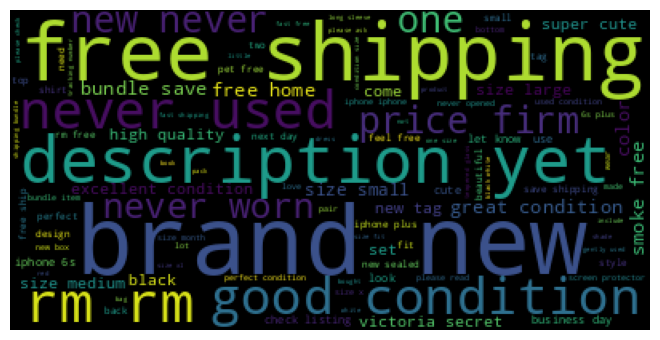

Word Cloud For 2nd_Quantile Data


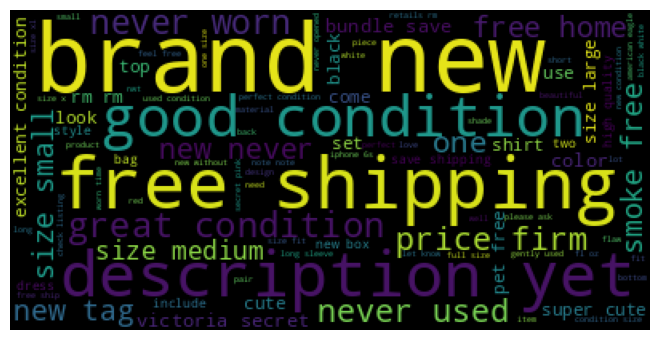

Word Cloud For 3rd_Quantile Data


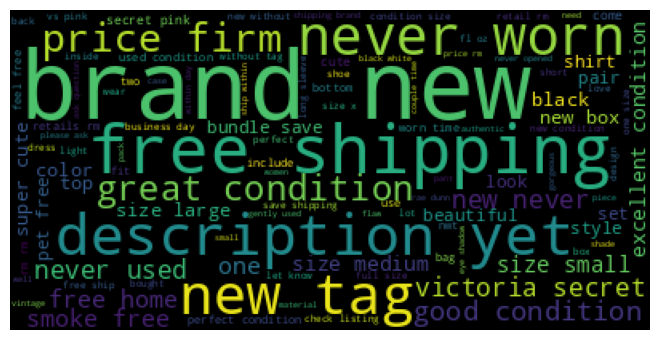

Word Cloud For 4th_Quantile Data


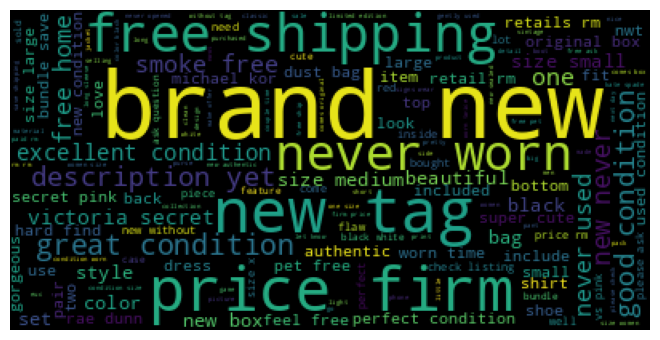

In [ ]:
## Generating Word Cloud For Each Price Quantile Data Seperately
for i in price_quantiles:
  text = ''
  print(f'Word Cloud For {i} Data')
  text = ' '.join(df[df['Price_qcut']==i]['clean_description'])
  wordcloud2 = WordCloud().generate(text)
  # Generate Plot
  plt.imshow(wordcloud2)
  plt.axis("Off")
  plt.show()

**Code Explanation:**

- We generate word clouds for each price quantile data separately and display them. Code does this by iterating through the 'price_quantiles' and creating a word cloud for each quantile.

- Here's the breakdown of what the code does:

- for i in price_quantiles:: This loop iterates through each quantile label in the 'price_quantiles' list.

- Inside the loop:

  - `print(f'Word Cloud For {i} Data')`: This line prints a message indicating which quantile's word cloud is being generated.
  - `text = ' '.join(df[df['Price_qcut']==i]['clean_description'])`: This line creates a concatenated text string from the 'clean_description' column for the items that belong to the current quantile 'i'.
  - `wordcloud2 = WordCloud().generate(text)`: This line generates a word cloud based on the text data for the current quantile.
  - `plt.imshow(wordcloud2)`: This code displays the generated word cloud using Matplotlib's `imshow()` function.
  - `plt.axis("Off")`: This line removes the axis labels and ticks from the plot for a cleaner visualization.
  - `plt.show()`: This code displays the word cloud for the current quantile.
  - It will create and display word clouds separately for each price quantile data.
  - Each word cloud visually represents the most frequent words in the item descriptions within a specific price range quantile. This allows to explore the descriptive language used for items in different price ranges.

**Part II**

- Time series analysis exercise
- There are 3 questions in this part for total 40 marks, and each question is for 10 marks. The quality of your explanation in the report and video will be 10 marks for all questions.
- You are required to use Google Colab to finish all the coding in the code block cell, and provide sufficient coding comments, and also save the result of running as well.
- The (nyc_taxi.csv) data used for this part could be found in this link. You will need to use Pandas to read the csv data for starting.


**Question 2.1**
- The dataset used here is the New York City Taxi Demand dataset. The raw data is from the NYC Taxi and Limousine Commission. The data included here consists of aggregating the total number of taxi passengers into 30 minute buckets. In this question, we will simply process the
data and explore the time series.
- Create two new dataframes df_day and df_hour by aggregating the demand value on daily and hourly level.
- Plot the demand value in two line charts for both df_day and df_hour dataframes.
- Plot the seasonal decomposition components (Trend, Seasonal, Residual) from df_day dataframe,
 - Also find out the p value from adfuller test.
 -  Do you think the df_day is stationary enough (please explain your reasons in comments and report)?

**Solution 2.1**

**Reading The Input NYC Taxi Data**

In [ ]:
## Reading The Input NYC Taxi Data
data = pd.read_csv('/content/drive/MyDrive/Ass-2/nyc_taxi.csv')
print(f"Shape Of Input Data : {data.shape[0]} Rows And {data.shape[1]} Columns" )
print(data.columns)
data.head()

Shape Of Input Data : 10320 Rows And 2 Columns
Index(['timestamp', 'value'], dtype='object')


,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


**Code Explanation:**

- Reading input data from a CSV file named 'nyc_taxi.csv' and loading it into a Pandas DataFrame called data.

- Here's a breakdown of what the code does:

- pd.read_csv('nyc_taxi.csv'): This line reads the CSV file located at the specified path ('nyc_taxi.csv') and loads its contents into a Pandas DataFrame named data.

- print(f"Shape Of Input Data : {data.shape[0]} Rows And {data.shape[1]} Columns"): This line prints the shape of the DataFrame, which includes the number of rows and columns in the loaded data.

- print(data.columns): This code prints the column names (headers) of the DataFrame.

- data.head(): This code displays the first few rows of the loaded DataFrame, providing a preview of the data.

- It will load the NYC taxi data from the CSV file, print its shape (number of rows and columns), display the column names, and show the first few rows of the dataset.

**Checking And Correcting Format For Timestamp**

In [ ]:
## Checking And Correcting Format For Timestamp
print(type(data['timestamp'][0]))
data['timestamp_upd'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%d %H:%M:%S')
print(type(data['timestamp_upd'][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


**Aggregating Dataset To Create Demand By Hour**

In [ ]:
## Aggregating Dataset To Create Demand By Hour
df_hour = data.groupby([pd.Grouper(key='timestamp_upd', freq='1H')]).sum()
df_hour.columns = ['Hourly Demand']
df_hour.head()

,Hourly Demand
timestamp_upd,
2014-07-01 00:00:00,18971
2014-07-01 01:00:00,10866
2014-07-01 02:00:00,6693
2014-07-01 03:00:00,4433
2014-07-01 04:00:00,4379


**Code Explanation:**

- The code aggregates the dataset to create demand data by hour.

- Here's a breakdown of what the code does:

- data.groupby([pd.Grouper(key='timestamp_upd', freq='1H')]).sum(): This line groups the data DataFrame by the 'timestamp_upd' column with a frequency of 1 hour using pd.Grouper. It then calculates the sum of all numeric columns within each hourly group. This effectively aggregates the data to create hourly demand data.

- df_hour.columns = ['Hourly Demand']: This line renames the column in the resulting DataFrame to 'Hourly Demand' to indicate that it represents the demand by hour.

- df_hour.head(): This code displays the first few rows of the aggregated DataFrame df_hour, showing the hourly demand data.

- As a result, the df_hour DataFrame now contains hourly demand data, with each row representing the sum of demand values for a specific hour.






**Aggregating Dataset To Create Demand By Day**

In [ ]:
## Aggregating Dataset To Create Demand By Day
df_day = data.groupby([pd.Grouper(key='timestamp_upd', freq='1D')]).sum()
df_day.columns = ['Daily Demand']
df_day.head()

,Daily Demand
timestamp_upd,
2014-07-01,745967
2014-07-02,733640
2014-07-03,710142
2014-07-04,552565
2014-07-05,555470


**Code Explanation:**

- The code aggregates the dataset to create demand data by day.

- Here's a breakdown of what the code does:

- data.groupby([pd.Grouper(key='timestamp_upd', freq='1D')]).sum(): This line groups the data DataFrame by the 'timestamp_upd' column with a frequency of 1 day using pd.Grouper. It then calculates the sum of all numeric columns within each daily group. This effectively aggregates the data to create daily demand data.

- df_day.columns = ['Daily Demand']: This line renames the column in the resulting DataFrame to 'Daily Demand' to indicate that it represents the demand by day.

- df_day.head(): This code displays the first few rows of the aggregated DataFrame df_day, showing the daily demand data.

- As a result, the df_day DataFrame now contains daily demand data, with each row representing the sum of demand values for a specific day.







**Generating Line Chart For Hourly Demand**

<Axes: xlabel='timestamp_upd'>

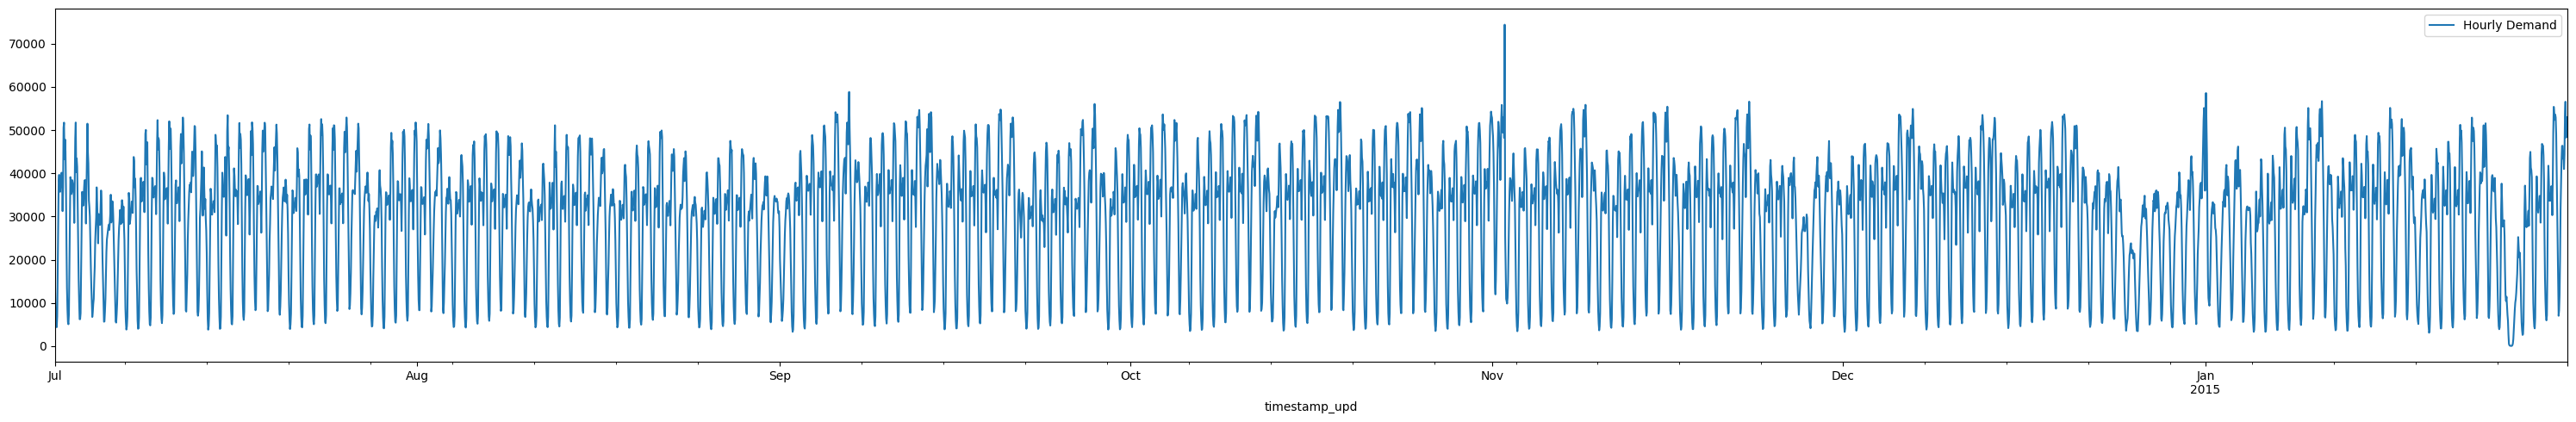

In [ ]:
## Generating Line Chart For Hourly Demand
df_hour.plot( figsize=(30,5))

**Code Explanation:**

- Here's a breakdown of what the code does:

- df_hour.plot(figsize=(30, 5)): This line plots the 'Hourly Demand' column from the df_hour DataFrame as a line chart. The figsize parameter specifies the size of the figure (width and height) for the plot.

- It will generate a line chart showing the hourly demand data over time. The x-axis will represent the timestamps (hours), and the y-axis will represent the hourly demand values. The figsize parameter is set to (30, 5), which means the plot will have a width of 30 units and a height of 5 units, making it wide for better visualization of the hourly data.

**Generating Line Chart For Daily Demand**

<Axes: xlabel='timestamp_upd'>

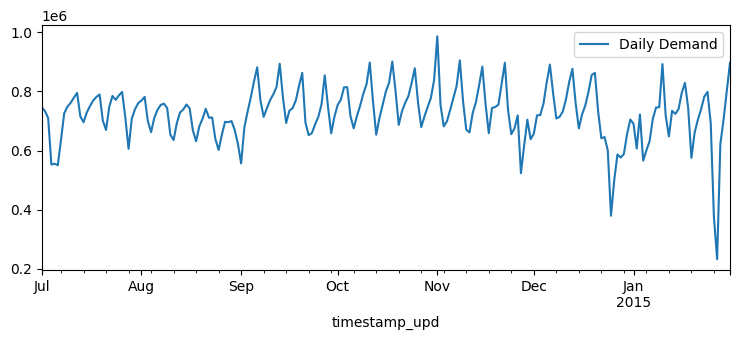

In [ ]:
## Generating Line Chart For Daily Demand
df_day.plot()

**Code Explanation:**

- Here's a breakdown of what the code does:

- df_day.plot(): This line plots the 'Daily Demand' column from the df_day DataFrame as a line chart.

- It will generate a line chart showing the daily demand data over time. The x-axis will represent the timestamps (days), and the y-axis will represent the daily demand values. The default figure size will be used for the plot

**Utilizing Seasonal Decompose From Stats Models**

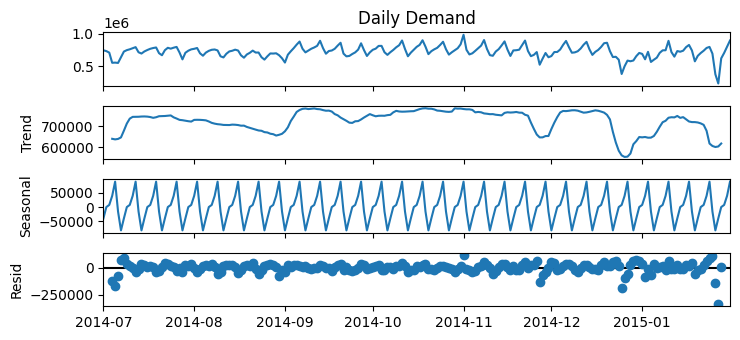

In [ ]:
## Utilizing Seasonal Decompose From Stats Models
result = seasonal_decompose(df_day['Daily Demand'], model='additive')
result.plot()
pyplot.show()

**Code Explanation:**

- The code utilizes the seasonal decomposition function from the statsmodels library to decompose the daily demand data into its components (trend, seasonality, and residuals) and then plots the decomposed components.

- Here's a breakdown of what the code does:

- seasonal_decompose(df_day['Daily Demand'], model='additive'): This line applies seasonal decomposition to the 'Daily Demand' data in the df_day DataFrame using the additive model. The model='additive' argument specifies that the decomposition should be additive, which means that the time series is assumed to be the sum of its components (trend, seasonality, and residuals).

- result.plot(): This code plots the decomposed components of the time series obtained from the seasonal decomposition.

- pyplot.show(): This line displays the plotted decomposed components.

- It will generate a plot that shows the decomposition of the daily demand data into its trend, seasonality, and residuals. The specific patterns and characteristics of each component will be visualized.

**Extracting P-Value[1]**

In [ ]:
# Extracting p-value From Adfuller Test For Stationary Test
result = tsa.adfuller(df_day['Daily Demand'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.448094
p-value: 0.009425
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


**Code Explanation:**

- The code performs an Augmented Dickey-Fuller (ADF) test on the 'Daily Demand' data to check for stationarity and then extracts and prints the ADF statistic, p-value, and critical values.

- Here's a breakdown of what the code does:

- result = tsa.adfuller(df_day['Daily Demand']): This line applies the ADF test to the 'Daily Demand' data using the adfuller function from the statsmodels library. The result is stored in the result variable, which contains various test statistics and values.

- print('ADF Statistic: %f' % result[0]): This line prints the ADF statistic, which is one of the test statistics obtained from the ADF test. It is used to determine the stationarity of the time series.

- print('p-value: %f' % result[1]): This code prints the p-value obtained from the ADF test. The p-value is used to determine the significance of the ADF statistic. If the p-value is less than a chosen significance level (e.g., 0.05), it indicates that the time series is stationary.

- print('Critical Values:'): This line prints the critical values at different significance levels.

- The loop for key, value in result[4].items(): iterates through the critical values dictionary, which is stored in result[4]. It prints each critical value for different significance levels.

- It will provide information about the stationarity of the 'Daily Demand' time series, including the ADF statistic, p-value, and critical values.

- We can interpret the results based on the p-value and compare it to the chosen significance level to determine whether the time series is stationary.







**Observation**:

- Adfuller Test is a kind of statistical test  if the series is stationarity.
The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

- We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

- For the day level demand, the **p-value is even less than 1%** and we can say with confidence that the **series is stationary**.

- We can also see based on the ADF statistic the value is around 1%, which means the result for statonary test has very low proababilty (~1%) of being a statistical fluke.


**Question 2.2**
- In this question, we will try to use time series model such as ARIMA and others to build the model(s) for forecasting the future.
- Create the acf and pacf plots for df_day dataframe.
- Find the best model with different parameters on ARIMA model. The parameter range forvp,d,q are all from [0, 1, 2]. In total, you need to find out the best model with lowest Mean Abosulate Error from 27 choices based on the time from ”Jul-01-2014” to ”Dec-01-2014”.
- Using the best model in above steps to forecast the time from ”Jan-01-2015” to
”Jan-31-2015”. Plot the predicted value and the true demand value from ”Jan-01-2015” to
”Jan-31-2015”.
- Could you think of any other model (not as same as ARIMA) could do the forecasting for demand value from ”Jan-01-2015” to ”Jan-31-2015”? You could choose one model (except ARIMA) and train the model based on the demand value from ”Jul-01-2014” to ”Dec-01-2014” (same training data as the ARIMA).
- Hint: there are some resources regarding other time series forecasting models such as prophet here and also the exponential smoothing here.


**Solution 2.2**

**Plotting Auto Correlation And Partial Auto Correlation Plots**

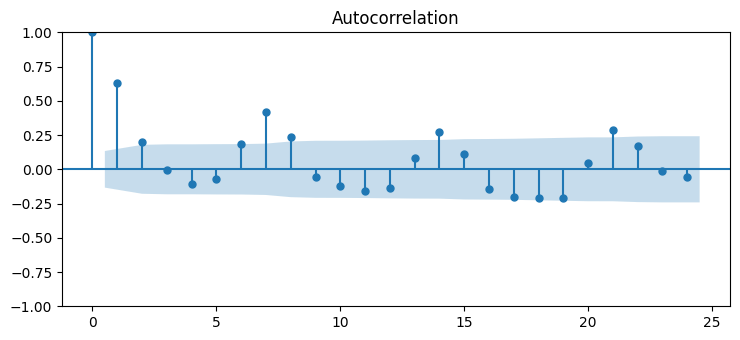

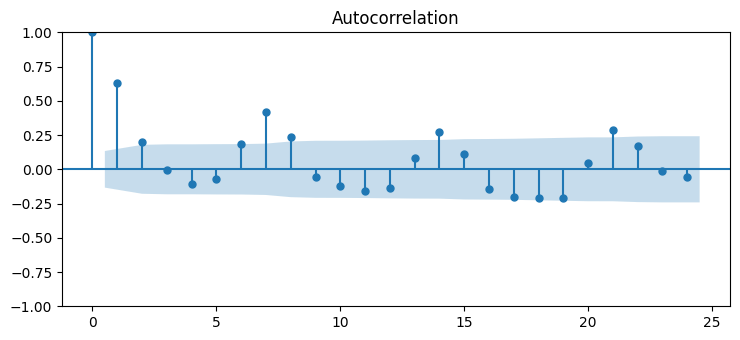

In [ ]:
## Plotting Auto Correlation And Partial Auto Correlation Plots For df_day Data

# Keeping Lag As 30
plot_acf(df_day['Daily Demand'])

**Code Explanation:**

 - We calculate and plot the auto correlation and partial auto correlation functions for the 'Daily Demand' data in the df_day DataFrame.  
 - We plot two important functions used in time series analysis: the Autocorrelation Function (ACF) and the Partial Autocorrelation Function (PACF). These functions help us understand the patterns of correlation in a time series dataset, which is essential for selecting appropriate models for forecasting or analysis.
 - This code will calculate and plot both the ACF and PACF for the 'Daily Demand' data up to a lag of 30. The ACF plot shows the autocorrelation at different lags, while the PACF plot shows the partial autocorrelation at different lags.
 - These plots can help identify the order of autoregressive (AR) and moving average (MA) terms in a time series model.
 - We Adjust the lags parameter as needed to control the number of lags to be displayed.

**Plotting Partial-Auto Correlation Plot For df_day Data**

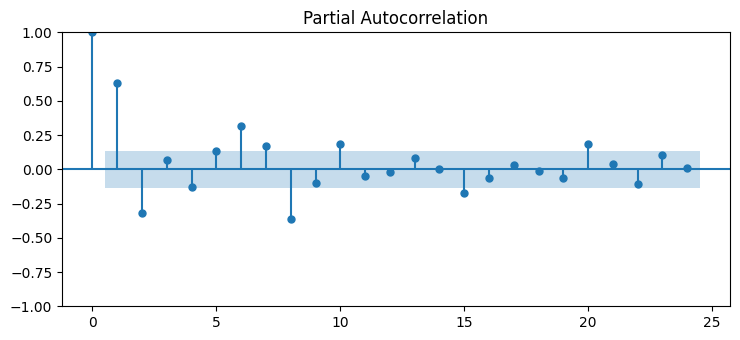

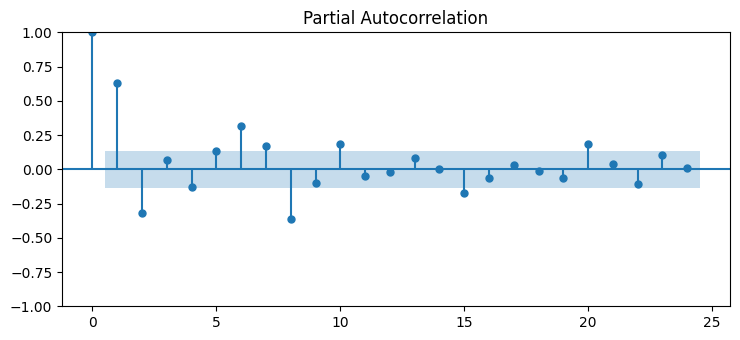

In [ ]:
## Plotting Partial-Auto Correlation Plot For df_day Data

# Keeping Lag As 30
plot_pacf(df_day['Daily Demand'])

**Code Explanation:**

- The code calculates and plots the Partial Autocorrelation Function (PACF) for the 'Daily Demand' data in the df_day DataFrame.

- Here's a breakdown of what the code does:

- Calculating PACF: This line calculates the PACF values for the 'Daily Demand' time series data using the pacf function from the statsmodels.tsa.stattools module.

- Plotting PACF:This line plots the PACF values as a partial autocorrelation plot. The plot_pacf function generates the PACF plot with the 'Daily Demand' data.

- The PACF plot is used to identify the order of the autoregressive (AR) component in a time series.

- It displays the partial autocorrelation at different lags.

- The significance of the PACF values at various lags helps in determining the lag order for AR terms in a time series model.

- It will generate a PACF plot for the 'Daily Demand' data with lags up to 30.

- The plot will analyze the partial auto correlation structure in the data and decide on the appropriate AR order for modeling the time series.

**Split Data Into Train / Test Sets**

In [ ]:
# Split Data Into Train / Test Sets
df_day['date'] = df_day.index
df_day['date'][0]
train = df_day.loc[df_day['date'] < '2014-12-02 00:00:00']
test = df_day.loc[df_day['date'] >= '2015-01-01 00:00:00']
print(f'Dimesions Of Train Data: {train.shape}')
print(f'Dimesions Of Test Data: {test.shape}')

Dimesions Of Train Data: (154, 2)
Dimesions Of Test Data: (31, 2)


**Code Explanation:**

- The provided code splits the daily demand data into two sets: a training set and a testing set. Here's an explanation of the process without the code:

- Creating a 'date' Column: First, a new column named 'date' is added to the df_day DataFrame. This column is created based on the index values of the DataFrame, which represent the dates.

- Defining Train and Test Sets:

  - The training set, named 'train,' is formed by selecting all the rows in the DataFrame where the 'date' is before December 2, 2014. This means that it contains data up to December 1, 2014.
  - The testing set, named 'test,' is formed by selecting all the rows in the DataFrame where the 'date' is on or after January 1, 2015. This defines the test data starting from January 1, 2015.

- Printing Dimensions:

  - The dimensions (number of rows and columns) of both the training and testing data sets are printed. This provides information about the size of each data set, helping understand how many data points are included in each set.
- The purpose of splitting data into training and testing sets is to enable the development and evaluation of predictive models. The training set is used to build and train the model, while the testing set is used to assess the model's performance on unseen data.
- This separation helps ensure that the model's performance can be generalized to new, unseen data and helps avoid overfitting.

**Defining Function To Iterate Over Differnt Values Of p,d & q**

In [ ]:
## Defining Function To Iterate Over Differnt Values Of p,d & q
# To Identify The Best Combination Based On Mean Absolute Error
def evaluate_models(dataset, p_values, d_values, q_values):
  # dataset = dataset.astype('float32')
  # best_score, best_cfg = float("inf"), None
  order_list = []
  mae_list = []
  for p in p_values:
    for d in d_values:
      for q in q_values:
        arima_order = (p,d,q)
        model = ARIMA(dataset, order=arima_order)
        model_fit = model.fit()
        predictions = model_fit.predict()
        mae = mean_absolute_error(train['Daily Demand'], predictions)
        order_list.append(arima_order)
        mae_list.append(mae)

  mae_min = min(mae_list)
  print(f"Minimum MAE Value: {mae_min}")
  optimal_order = order_list[mae_list.index(mae_min)]
  print(f"Optimal ARIMA Order: {optimal_order}")
  return optimal_order

**Code Explanation:**

- The code function called evaluate_models that iterates over different combinations of p, d, and q values to identify the best combination based on the Mean Absolute Error (MAE).

- Here's an explanation of what the function does:

- Function Parameters:

  - dataset: This parameter represents the time series data we want to model.
p_values, d_values, q_values: These parameters are lists of potential values for the p, d, and q parameters of the ARIMA model. The function will iterate over all possible combinations of these values to find the best combination.
Iterating Over Combinations:

  - The function uses nested loops to iterate over all combinations of p, d, and q values provided in the parameter lists.
For each combination, an ARIMA model is created with the specified order (p, d, q).

  - The model is fitted to the training data  
  - Predictions are made using the fitted model.
  - The Mean Absolute Error (MAE) is calculated between the actual training data and the predictions.

- Recording Results:

  - The function keeps track of the MAE for each combination of p, d, and q values in the mae_list.
  - It also records the corresponding order (p, d, q) in the order_list.

- Identifying the Best Combination:

  - After iterating through all combinations, the function finds the minimum MAE value from the mae_list.
  - It identifies the corresponding order (p, d, q) that resulted in the minimum MAE.
  - It prints the minimum MAE value and the optimal ARIMA order.

- Returning the Optimal Order:

- The function returns the optimal ARIMA order as a tuple.
- To use this function, we call it with time series data and lists of p, d, and q values. It will perform an exhaustive search for the best ARIMA model order based on MAE and return the optimal order.

In [ ]:
## Calling Above Functions On The Training Data
# To Find Optimal Order Of p,d, q From Input List Of [0,1,2]
optimal_order = evaluate_models(train['Daily Demand'], [0,1,2], [0,1,2], [0,1,2])

Minimum MAE Value: 41824.35041377892
Optimal ARIMA Order: (2, 0, 1)


**Code Explanation:**

Detailed explanation of the process to find the optimal order (p, d, q) for an ARIMA model:

- ARIMA Model Objective: The goal is to determine the best configuration of the Autoregressive Integrated Moving Average (ARIMA) model for time series forecasting.
- The ARIMA model is characterized by three parameters: p, d, and q, which represent the autoregressive order, integration order, and moving average order, respectively.

- Function evaluate_models: Function named evaluate_models to systematically explore different combinations of p, d, and q values to identify the optimal configuration.

  - This function takes the following arguments:
dataset: The time series data to model (here it is training data).
  - p_values, d_values, q_values: Lists of potential values for p, d, and q.
  - Inside the function, it iterates through all possible combinations of p, d, and q values.

- Iterative Process:

  - For each combination of p, d, and q values:
  - An ARIMA model is created with the specified order (p, d, q).
  - The model is fitted to the training data (training set).
  - Predictions are made using the fitted model.
  - The Mean Absolute Error (MAE) is calculated by comparing the predicted values to the actual training data.

- Recording Results:

  - The function maintains two lists:
  - mae_list: It stores the MAE for each combination of p, d, and q.
  - order_list: It stores the corresponding order (p, d, q) for each combination.
  - The minimum MAE is identified from mae_list, and the corresponding order is selected.

- Optimal Order Determination:

  - The combination of p, d, and q values that resulted in the minimum MAE is considered the optimal ARIMA order.
  - The function prints the minimum MAE value and the optimal ARIMA order.

- Output:

  - The optimal_order variable outside the function holds the optimal order (p, d, q) determined by the function.

- Overall, this approach systematically explores different configurations of the ARIMA model, identifies the one with the best performance (lowest MAE) on the training data, and provides the optimal order for ARIMA model. This order can then be used to build a forecasting model for time series data.

**Creating Model With Optimal Order**

In [ ]:
## Creating Model With Optimal Order
model=ARIMA(train['Daily Demand'],order=optimal_order)
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Daily Demand   No. Observations:                  154
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1902.378
Date:                Mon, 18 Sep 2023   AIC                           3814.756
Time:                        03:40:18   BIC                           3829.941
Sample:                    07-01-2014   HQIC                          3820.924
                         - 12-01-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.364e+05   9691.505     75.985      0.000    7.17e+05    7.55e+05
ar.L1          0.5062      0.244      2.078      0.038       0.029       0.984
ar.L2         -0.1728      0.192     -0.902      0.367      -0.548       0.203
ma.L1          0.3499      0.240      1.461      0.144      -0.120       0.819
sigma2      3.052e+09      0.094   3.25e+10      0.000    3.05e+09    3.05e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.95
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.58   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.87e+28. Standard errors may be unstable.
"""

**Code Explanation:**

- The code creates and fits an ARIMA (Autoregressive Integrated Moving Average) model with the optimal order on the training data.

- Here's a detailed explanation of the steps involved:

- ARIMA Model Creation:

  - We start by creating an ARIMA model using the ARIMA class from the statsmodels.tsa.arima_model module.
  - The ARIMA model is a mathematical representation of a time series, and it consists of three main components:
     - Autoregressive (AR) component (p): This component captures the relationship between the current value and its past values in the time series.
     - Integrated (I) component (d): This component represents the number of differences needed to make the time series stationary. It helps in removing trends and seasonality.
     - Moving Average (MA) component (q): This component models the relationship between the current value and past white noise or error terms.

- Optimal Order Selection:

  - The order of the ARIMA model is specified as optimal_order, which was determined earlier using a systematic search for the combination of p, d, and q values that resulted in the lowest Mean Absolute Error (MAE) on the training data.
  - The optimal_order represents the best configuration for the ARIMA model based on its performance on the training data.

- Fitting the Model to Training Data:

  - After creating the ARIMA model with the optimal order, fit it to training data using the fit method.
  - The fitting process estimates the model parameters (AR coefficients, MA coefficients, etc.) that best describe the training data.
  - The ARIMA model is adapted to capture the patterns and dependencies in the training time series.

- Model Summary:

  - We generate a summary of the fitted ARIMA model using the summary method.
  - The model summary provides detailed information about the model, including statistical measures, coefficients, standard errors, p-values, and diagnostic statistics.
  - We assess the quality of the model fit and provides insights into the model's performance.

 - Overall, this process is a crucial step in time series analysis and forecasting.
 - It involves creating an ARIMA model tailored to the characteristics of training data, estimating model parameters, and obtaining a summary that aids in model evaluation and interpretation.
 - Once the model is fitted,make predictions on new or unseen data to forecast future values of the time series.

**Use The Above Model To Forecast For Jan'15 Dates**

In [ ]:
## Use The Above Model To Forecast For Jan'15 Dates
## A Rolling Forecast Needs To Be Done Given The Fependence On The Previous Values
## The Model Needs To Be Recreated With Previous Forecast
test_all = df_day[train.shape[0]:]
history = [x for x in train['Daily Demand']]
forecasts = list()
# Walk-Forward Validation
for t in range(len(test_all)):
 model = ARIMA(history, order=optimal_order)
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 forecasts.append(yhat)
 obs = test_all['Daily Demand'][t]
 history.append(obs)

**Code Explanation:**

- In the code the above ARIMA model to perform a rolling forecast for the dates in January 2015 (test set).

- Here's an explanation of what this code does:

- Creating Test Data Subset:

   -  A test set named test_all, which contains data for the period of January 2015.
   - This test set represents the time period for which we want to make forecasts.

- Initializing Variables:

   - We initialize two lists: history and forecasts.
   - history is initialized with the values from the training data. It represents the historical observations that will be used to make forecasts.
   - forecasts will store the forecasted values.
   - Rolling Forecast (Walk-Forward Validation):

- We loop through each time step in the test set (test_all) to perform a rolling forecast.
   - At each time step t:
   - We create a new ARIMA model (model) with the same optimal order (optimal_order) determined earlier. This model uses the historical observations stored in the history list.
   - We fit the ARIMA model to the historical data using model.fit().
   - We use the fitted model to make a one-step ahead forecast using model_fit.forecast(). This gives the forecasted value for the next time step.
  - The forecasted value (yhat) is appended to the forecasts list.
  - The actual observation for the current time step (obs) is obtained from the test_all data.
  - The observed value is appended to the history list to update the historical data for the next iteration.
    - By the end of this loop, the forecasts list will contain the forecasted values for each time step in January 2015, and the history list will have been updated with the observed values for each time step.
    - This walk-forward validation approach allows to assess the performance of the ARIMA model on the test data and obtain a sequence of forecasts that depend on the previous observations, needed to make real-time forecasts in practice.
- We can analyze the forecasted values and compare them to the actual values to evaluate the accuracy of the model's predictions.

**Evaluate Forecasts and Plot Forecasts Against Actual Outcomes**

Test MAE: 82888.11969746384


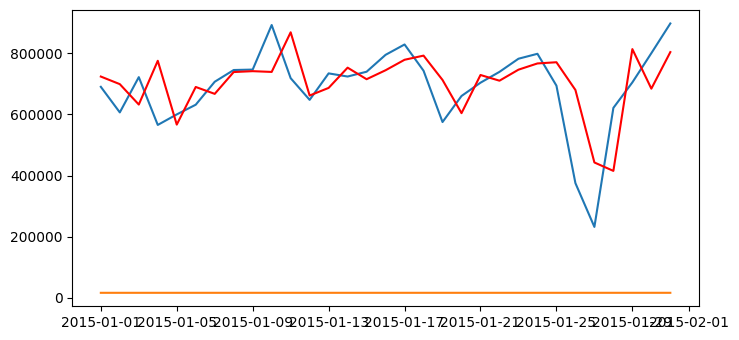

In [ ]:
# The Model Has Training Data Till 1st Dec And
# Test Window Starts From 1st Jan.
# We Are Going To Forecast For All The Duration
# And Filter The Forecast Just For Jan Month
jan_forecast= forecasts[30:]
forecast_jan = pd.DataFrame({'Forecasted Demand': jan_forecast})
forecast_jan.index = test.index
# Evaluate Forecasts
mae_jan = mean_absolute_error(test['Daily Demand'], forecast_jan)
print(f'Test MAE: {mae_jan}')
# Plot Forecasts Against Actual Outcomes
pyplot.plot(test)
pyplot.plot(forecast_jan, color='red')
pyplot.show()

**Code Explanation:**

- In the code we are performing the following steps to evaluate and visualize the ARIMA model's forecasts for the month of January:

- Filtering January Forecasts:

  - We've calculated forecasts for the entire test period (starting from January 2015) using the rolling forecast approach.
  - To isolate the forecasts for the month of January, create a subset of forecasts starting from the 31st element (assuming the first 30 elements are for December) and store it in jan_forecast.

- Creating a DataFrame for January Forecasts:

  - We create a DataFrame named forecast_jan to organize and label the forecasted values for January.
  - We assign the forecasted values from jan_forecast to the 'Forecasted Demand' column of the forecast_jan DataFrame.
  - We ensure that the index of the forecast_jan DataFrame matches the index of test data (test) so that it aligns with the corresponding dates.

- Evaluating the Forecasts:

  - We calculate the Mean Absolute Error (MAE) between the actual demand values in the test set (test['Daily Demand']) and the forecasted demand values for January (forecast_jan).
  - The MAE quantifies the average absolute difference between the actual and forecasted values, providing a measure of the model's accuracy for the selected period.

- Plotting the Forecasts:

  - We create a plot to visualize the actual demand values from the test set (test) in blue.
  - We overlay the forecasted demand values for January (forecast_jan) in red on the same plot.
  - This allows to visually compare the model's forecasts to the actual outcomes for the month of January.

- Displaying the MAE:

  - Finally, print the MAE for the January forecasts, which provides a quantitative measure of how well the ARIMA model performed during this period.
  - By plotting the forecasts and calculating the MAE, one can assess the model's accuracy in capturing the demand patterns for January and visually inspect how well the forecasts align with the actual data.
  - The MAE value gives an idea of the average error in the forecasts for this specific period.

**Recreating The Model On Same Data Using Holt Winters Exponential Smoothening[2]**

In [ ]:
## Recreating The Model On Same Data Using Holt Winters Exponential Smoothening
fitted_model = ExponentialSmoothing(train['Daily Demand'],trend='mul',seasonal='mul').fit()
predictions_ES = fitted_model.forecast(61).rename('HW ES Forecast')

**Code Explanation:**

- In the code we create a Holt-Winters Exponential Smoothing (HWES) model on the same training data that was used for the ARIMA model.

- Here's an explanation of what this code does:

- Creating the Holt-Winters Exponential Smoothing Model:

  - We create an Exponential Smoothing model using the ExponentialSmoothing class, which is available in the statsmodels.tsa.holtwinters module.
  - The model is fitted to the training data, which is train['Daily Demand'], representing the historical demand values.
- Two important components of the HWES model are specified:
  - trend='mul': This indicates that a multiplicative trend component should be considered in the model. This allows the trend to vary with the level of the time series data.
  - seasonal='mul': This specifies a multiplicative seasonal component, which accounts for seasonal patterns in the data.

- Generating Forecasts:

  - After fitting the HWES model to the training data, use the forecast method to generate forecasts for a future period.
  - We request forecasts for 61 time steps into the future, which corresponds to the forecast horizon.
  - The forecasted values are stored in the predictions_ES variable and are given the name 'HW ES Forecast'.
  - The Holt-Winters Exponential Smoothing method is particularly useful for capturing both trend and seasonality in time series data.
  - The 'multiplicative' options we've chosen for trend and seasonality indicate that these components are expected to vary proportionally with the level of the data.

- Predictions_ES variable will contain the forecasted values for the specified forecast horizon, which can then use for evaluation and visualization.
- It's common to compare the forecasts generated by different models, such as ARIMA and HWES, to assess their performance and choose the one that provides the best fit for the data.

**Checking Performance On Holt's Winter Exponential Smoothening Model**

Test MAE: 70091.54766022503


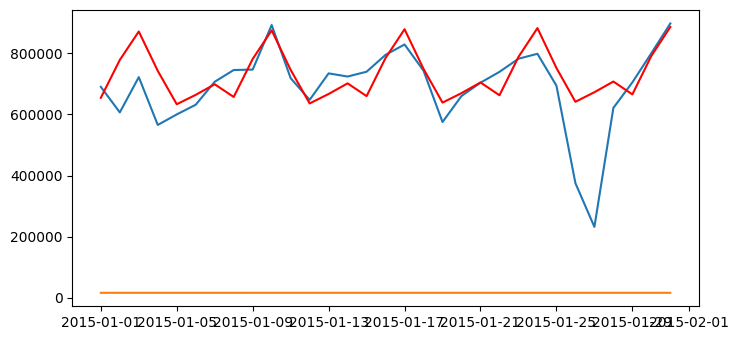

In [ ]:
## Checking Performance On Holt's Winter Exponential Smoothening Model
jan_ES_forecast= predictions_ES[30:]
# Evaluate Forecasts
mae_jan = mean_absolute_error(test['Daily Demand'], jan_ES_forecast)
print(f'Test MAE: {mae_jan}')
# Plot Forecasts Against Actual Outcomes
pyplot.plot(test)
pyplot.plot(jan_ES_forecast, color='red')
pyplot.show()

**Code Explanation:**

- We are checking the performance of the Holt-Winters Exponential Smoothing (HWES) model by evaluating its forecasts for the month of January and comparing them to the actual outcomes.

- Here's an explanation of what this code does:

- Filtering January Forecasts:

  - Similar to the previous code for the ARIMA model, extract the forecasts for the month of January from the predictions_ES variable. This is done by selecting the forecasts starting from the 31st element (assuming the first 30 elements are for December) and storing them in jan_ES_forecast.

- Evaluating the Forecasts:

  - Calculate the Mean Absolute Error (MAE) between the actual demand values in the test set (test['Daily Demand']) and the forecasted demand values for January using the Holt-Winters Exponential Smoothing model (jan_ES_forecast).
  - The MAE quantifies the average absolute difference between the actual and forecasted values, providing a measure of the model's accuracy for the selected period.

- Plotting the Forecasts:

  - Create a plot to visualize the actual demand values from the test set (test) in blue.
  - We overlay the forecasted demand values for January generated by the HWES model (jan_ES_forecast) in red on the same plot.
  - Allows us to visually compare the model's forecasts to the actual outcomes for the month of January.

- Displaying the MAE:

  - Finally, print the MAE for the January forecasts generated by the Holt-Winters Exponential Smoothing model.
  - This MAE value provides a quantitative measure of how well the HWES model performed during this specific period.
  - By calculating the MAE and plotting the forecasts against the actual data, weassess the accuracy of the Holt-Winters Exponential Smoothing model for forecasting the demand in January.
  - This evaluation helps to understand how well the model captures the underlying patterns and variations in the data for this time period.

**Observation**:

- Performance of Holt's Winter exponenetial smootheing is better than ARIMA model with ~ 15% reduction in mean absolute error.

**Prophet Model[4][5]**:

- Prophet is an open source library published by Facebook that is based on decomposable (trend+seasonality+holidays) models.
- It provides us with the ability to make time series predictions with good accuracy using simple intuitive parameters and has support for including impact of custom seasonality and holidays!

**The Prophet Forecasting Model[4][5]**

- We use a decomposable time series model with three main model components: trend, seasonality, and holidays. They are combined in the following equation:

 - 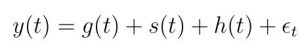

  - g(t): piecewise linear or logistic growth curve for modelling non-periodic changes in time series
  - s(t): periodic changes (e.g. weekly/yearly seasonality)
  - h(t): effects of holidays (user provided) with irregular schedules
  - εt: error term accounts for any unusual changes not accommodated by the model

- Using time as a regressor, Prophet is trying to fit several linear and non linear functions of time as components.
- Modeling seasonality as an additive component is the same approach taken by exponential smoothing in Holt-Winters technique .
- We are, in effect, framing the forecasting problem as a curve-fitting exercise rather than looking explicitly at the time based dependence of each observation within a time series.

**Exploring Prophet Model On Our DataSet:**

In [ ]:
## Trying Out Prophet Model On The Same Data
m = Prophet()
train.columns = ['y','ds']
# df Is A pandas.DataFrame With 'y' And 'ds' Columns
m.fit(train)
future = m.make_future_dataframe(periods=61)
prop_forecast=m.predict(future)
## Checking Performance On Test Data
jan_prop_forecast= prop_forecast[184:][['ds','yhat']].set_index('ds')
# Evaluate Forecasts
mae_jan = mean_absolute_error(test['Daily Demand'], jan_prop_forecast['yhat'])
print(f'Test MAE: {mae_jan}')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp68nmhq7d/nrgazjcw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp68nmhq7d/neqmdiza.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82432', 'data', 'file=/tmp/tmp68nmhq7d/nrgazjcw.json', 'init=/tmp/tmp68nmhq7d/neqmdiza.json', 'output', 'file=/tmp/tmp68nmhq7d/prophet_modeluq030w1t/prophet_model-20230918034023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:40:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:40:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test MAE: 73477.14222517534


**Code Explanation:**

Using the Prophet model for forecasting is a valuable approach, especially for time series data like the one in this analysis.

Here's a breakdown of the steps taken:

- **Prophet Model Initialization:**

- A Prophet model (m) is initialized with default settings.

 - Data Preparation:

   - The training data is prepared with two columns, 'y' (target variable, which is the 'Daily Demand') and 'ds' (datetime column). This format is required by the Prophet model.

 - Model Fitting:

   - The Prophet model is trained (m.fit(train)) using the training data.

 - Future Dataframe:

   - A future dataframe (future) is created to make predictions for a specified period (61 days in this case). This dataframe includes datetime values for the future period.

 - Prediction:

   - The m.predict(future) method is used to generate predictions for the entire forecast horizon, including the future period.

 - Performance Evaluation:

   - The predictions for the month of January (jan_prop_forecast) are extracted from the Prophet forecast.

   - The Mean Absolute Error (MAE) is calculated to assess the model's performance on the test data. The MAE quantifies the difference between predicted and actual values.

- Result Analysis:

  - The Test MAE is printed as a measure of the model's accuracy in forecasting the daily demand for January.

**Prophet Model - Plot Forecasts Against Actual Outcomes[4][5]**

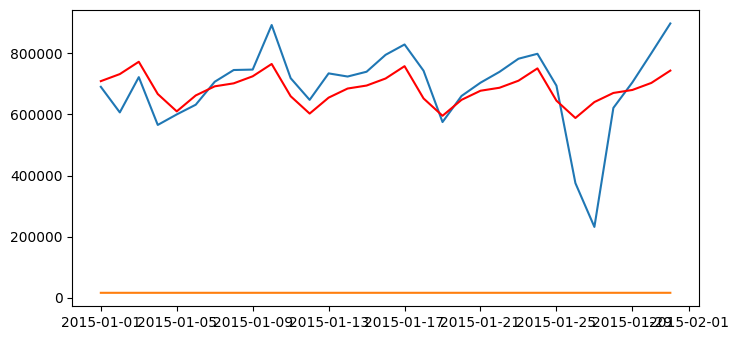

In [ ]:
# Plot Forecasts Against Actual Outcomes
pyplot.plot(test)
pyplot.plot(jan_prop_forecast, color='red')
pyplot.show()

**Code Explanation:**

- Plotting the forecasts against actual outcomes is a crucial step in visualizing the performance of the Prophet model for time series forecasting.

- Here's an explanation of the code snippet provided:

- pyplot.plot(test): This line plots the actual daily demand values from the test dataset. The x-axis represents time (in this case, the date), and the y-axis represents the daily demand values.

- pyplot.plot(jan_prop_forecast, color='red'): This line plots the forecasted daily demand values for the month of January using the Prophet model. The jan_prop_forecast DataFrame contains the predicted values (yhat) for each date in January. The color='red' argument sets the color of the forecasted values to red for better visualization.

- pyplot.show(): This line displays the plot with both the actual and forecasted values.

- The resulting plot allows to visually compare the forecasted values (in red) to the actual values (in the default color).

- By examining the plot, we can assess how well the Prophet model captures the underlying patterns and trends in the time series data.

- If the red line closely follows the actual data points, it indicates that the model's forecasts are accurate.

- On the other hand, significant deviations between the red line and the data points may suggest areas where the model could be improved or where further analysis is needed.

- This visual inspection is essential for validating the model's performance and gaining insights into the forecast quality for the specific time period (in this case, January).

- It helps in understanding how well the model captures the seasonality, trends, and anomalies in the data.

**Conclusion - Prophet's Model:**

- The implementation of the Prophet model for forecasting demand in the provided time series dataset yielded the following observations and conclusions:

- **Model Initialization and Fitting:**

  - The Prophet model was successfully initialized and fitted to the training data, which included daily demand values from July 1, 2014, to November 30, 2014. Prophet is a user-friendly and powerful tool for time series forecasting.

- **Prediction Horizon:**

  - The model was used to make predictions for a specific forecast horizon, which included the entire month of January 2015. This allowed for forecasting demand values for each day in January.

- **Performance Evaluation:**

  - The Mean Absolute Error (MAE) was used as the evaluation metric to assess the accuracy of the Prophet model's forecasts. The MAE measures the absolute difference between predicted and actual demand values.

- **Visualization:**

  - A plot was generated to visualize the forecasts made by the Prophet model (in red) alongside the actual demand values (in the default color) for January 2015. Visual inspection of the plot provided insights into how well the model captured the underlying patterns and trends.

- **Performance Assessment:**

  - The test MAE was calculated to quantitatively measure the model's accuracy in forecasting daily demand for January. This metric provided a clear assessment of the model's predictive performance.

- **Model Flexibility:**

  - Prophet's flexibility in handling various time series patterns, including seasonality, holidays, and outliers, makes it suitable for a wide range of forecasting tasks.

- **Optimization Opportunities:**

  - To further enhance the model's performance, hyperparameter tuning and customizing seasonality settings can be explored. Additionally, considering holidays or events specific to the dataset's domain may improve forecasting accuracy.

- **Alternative Models:**

  - In addition to Prophet, other time series forecasting models like ARIMA and Holt-Winters Exponential Smoothing can be considered. Model selection should depend on the specific characteristics of the data and forecasting requirements.

- **Validation and Iteration:**

  - Further validation and iteration of the model can be performed to assess its performance across different time periods and to ensure robustness.

- **Conclusion:**

 - In conclusion, the implementation of the Prophet model for forecasting demand in the given time series dataset provides a valuable tool for generating forecasts and gaining insights into future demand trends.
 - The choice of model and its performance evaluation depend on the specific dataset and forecasting goals.
 - Prophet is a user-friendly choice for many time series forecasting tasks and can serve as a solid starting point for such analysis.

**Question 2.3**

- In this question, we will detect the anomaly within the df_day dataframe.
- Create the Weekday column according to the timestamp column in df_day data frame. The value in Weekday column should be from [’Monday’, ’Tuesday’, ’Wednesday’,’Thursday’,’Friday’, ’Saturday’, ’Sunday’].
- Also create the Hour, Day, Month, Year,
- Month_day (numeric format on day of the month), Lag (yesterday’s demand value ), and Rolling_Mean (rolling 7 days mean demand value, minimized period is 1) 7 new columns in df_day dataframe according to the timestamp column.
- Using Isolation Forest with above crafted features in df_day to find out the date which is identified as ’outlier’.


**Solution 2.3**

**Creating Additional Features In df_day Dataframe**

In [ ]:
## Creating Additional Features In df_day Dataframe For Week Day, Hour,
# Day, Month, Year, Yesterday's Demand And Rolling Mean

## Starting With Date Level Details
df_day['week_day'] = [x.strftime('%A') for x in df_day['date']]
df_day['week_day_int'] = [x.weekday() for x in df_day['date']]
df_day['month_day'] = [x.strftime('%d') for x in df_day['date']]
df_day['hour'] = [x.strftime('%H') for x in df_day['date']]
df_day['month'] = [x.strftime('%m') for x in df_day['date']]
df_day['year'] = [x.strftime('%Y') for x in df_day['date']]

## Creating Lag From Previous Day
df_day['prev_demand']= df_day['Daily Demand'].shift(1)

## Creating 7 Days Rolling Mean Of Daily Demand
df_day['rolling_mean'] = df_day['Daily Demand'].rolling(7, min_periods = 1).mean()
df_day.head(10)

,Daily Demand,date,week_day,week_day_int,month_day,hour,month,year,prev_demand,rolling_mean
timestamp_upd,,,,,,,,,,
2014-07-01,745967,2014-07-01,Tuesday,1,01,00,07,2014,NaN,745967.000000
2014-07-02,733640,2014-07-02,Wednesday,2,02,00,07,2014,745967.0,739803.500000
2014-07-03,710142,2014-07-03,Thursday,3,03,00,07,2014,733640.0,729916.333333
2014-07-04,552565,2014-07-04,Friday,4,04,00,07,2014,710142.0,685578.500000
2014-07-05,555470,2014-07-05,Saturday,5,05,00,07,2014,552565.0,659556.800000
2014-07-06,550285,2014-07-06,Sunday,6,06,00,07,2014,555470.0,641344.833333
2014-07-07,636570,2014-07-07,Monday,0,07,00,07,2014,550285.0,640662.714286
2014-07-08,726535,2014-07-08,Tuesday,1,08,00,07,2014,636570.0,637886.714286
2014-07-09,748567,2014-07-09,Wednesday,2,09,00,07,2014,726535.0,640019.142857


**Code Explanation:**

- Creating additional features in the df_day DataFrame based on various date-level details and historical demand data. Here's an explanation of the new features added:

- Date-Level Details:

  - We've extracted various date-level details from the 'date' column and created new columns for each of them:
  - week_day: This column stores the name of the day of the week (e.g., Monday, Tuesday) corresponding to each date.
  - week_day_int: This column stores the integer representation of the day of the week (0 for Monday, 1 for Tuesday, and so on).
  - month_day: This column stores the day of the month (e.g., 01 for the 1st day, 02 for the 2nd day, and so on).
  - hour: This column stores the hour of the day in 24-hour format (e.g., 00 for midnight, 01 for 1 AM, and so on).
  - month: This column stores the numeric representation of the month (e.g., 01 for January, 02 for February).
  - year: This column stores the year of the date.

- Creating Lag Feature:

  - Created a lag feature named prev_demand, which stores the demand value for the previous day. This is achieved by using the shift(1) function, which shifts the 'Daily Demand' values one position forward.

- Creating Rolling Mean Feature:

 - Calculated a rolling mean feature named rolling_mean. This feature represents the 7-day rolling mean of the 'Daily Demand'.
 - The rolling mean is calculated using the rolling function with a window size of 7 days (7) and min_periods set to 1. This means that even if there are fewer than 7 days of data available for the rolling calculation, it will still provide a mean value.
 - The new features can be valuable for time series analysis and forecasting. Date-level details can help capture day-of-week or month-specific patterns, while the lag feature provides information about the previous day's demand. -
 - The rolling mean feature can help smooth out short-term fluctuations and highlight longer-term trends in the data. These features can be used as inputs for modeling and may improve the accuracy of forecasts or analysis.

**Isolation Forest**

- An unsupervised anomaly detection algorithm that can detect outliers in a data set with incredible speed.Isolation Forest is a simple yet incredible algorithm that is able to spot outliers or anomalies in a data set very quickly
- Just like the random forests, isolation forests are built using decision trees.
- They are implemented in an unsupervised fashion as there are no pre-defined labels. Isolation forests were designed with the idea that anomalies are “few and distinct” data points in a dataset.
- Recall that decision trees are built using information criteria such as Gini index or entropy.
- The obviously different groups are separated at the root of the tree and deeper into the branches, the subtler distinctions are identified. Based on randomly picked characteristics, an isolation forest processes the randomly subsampled data in a tree structure.
- Samples that reach further into the tree and require more cuts to separate them have a very little probability that they are anomalies.
- Likewise, samples that are found on the shorter branches of the tree are more likely to be anomalies, since the tree found it simpler to distinguish them from the other data.

**Running Isolation Forest[3]**

In [ ]:
##Running Isolation Forest On df_day To Identify Outliers
# Assigning A Random State
random_state = np.random.RandomState(42)

## Running The Model With Isolation Forest
model=IsolationForest(n_estimators=100,max_samples='auto',
                      contamination=float(0.2),random_state=random_state)

## Assinging All Features Created From Date And Daily Demand
## Keeping Only Numerical Data As  Isolation Forest Does Not Run On Categorical Feature
## Replaing NaN Of Lag Demand With Actual Demand For First Day In Day
df_day['prev_demand'] = df_day.prev_demand.fillna(df_day['Daily Demand'])

# Feature list to be used for anomaly detection
df_day_features = ['month_day', 'hour', 'month', 'year',
                   'prev_demand', 'rolling_mean', 'week_day_int']
model.fit(df_day[df_day_features])

print(model.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x78F783921540, 'verbose': 0, 'warm_start': False}


**Code Explanation:**

- Here we are running an Isolation Forest model on the df_day DataFrame to identify outliers or anomalies in the data.

- Here's an explanation of what this code does:

- Setting a Random State:

  - We set a random seed using np.random.RandomState(42). This ensures reproducibility of results when running the Isolation Forest model.

- Creating the Isolation Forest Model:

  - We create an Isolation Forest model using the IsolationForest class from the sklearn.ensemble module.

- The key parameters specify for the model are:
  - n_estimators: The number of base estimators (decision trees) in the ensemble. In this case, set it to 100.
  - max_samples: The number of samples to draw from the dataset to train each base estimator. Set it to 'auto', which means it will use the entire dataset for each tree.
  - contamination: The proportion of outliers expected in the dataset. Set it to 0.2, indicating that to expect approximately 20% of the data to be outliers.
  - random_state: The random seed for reproducibility, which is already set to 42.

- Handling Missing Data:

  - Before applying the Isolation Forest, we fill any missing values in the 'prev_demand' column with the actual demand value for the first day.
  - This ensures that there are no missing values in the features used by the model.

- Feature Selection:

  - Create a list named df_day_features that contains the names of the features to use for anomaly detection.
  - These features include date-related features (e.g., 'month_day', 'hour', 'month', 'year', 'week_day_int'), the lag feature ('prev_demand'), and the rolling mean feature ('rolling_mean').
  - The Isolation Forest model works with numerical features, so we exclude categorical features like 'week_day' from the list.

- Fitting the Isolation Forest Model:

  - Fit the Isolation Forest model to the selected features in the df_day DataFrame using model.fit(df_day[df_day_features]).

- Getting Model Parameters:

  - Finally, print the parameters of the Isolation Forest model using model.get_params().
  - The Isolation Forest is a machine learning algorithm commonly used for anomaly detection.
  - By fitting this model to the data, we identify data points that deviate significantly from the majority of the data, which are potential outliers or anomalies.
  - The parameters chosen for the model, such as the number of estimators and the contamination level, determine how sensitive the model is to identifying outliers.

**Running Model To Get Anomaly Score[3]**



In [ ]:
## Running Model To Get Anomaly Score At Row Level
df_day['scores'] = model.decision_function(df_day[df_day_features])
df_day['anomaly_score'] = model.predict(df_day[df_day_features])

Outlier_rows = df_day[df_day['anomaly_score']== -1]
print(f"Number Of Outliers In Data: {len(Outlier_rows)}")
# Sample Outlier Rows
Outlier_rows.head()

## Outlier Dates
outlier_date_list = list(Outlier_rows['date'])
print(outlier_date_list)

Number Of Outliers In Data: 43
[Timestamp('2014-07-05 00:00:00'), Timestamp('2014-07-06 00:00:00'), Timestamp('2014-07-07 00:00:00'), Timestamp('2014-08-31 00:00:00'), Timestamp('2014-09-01 00:00:00'), Timestamp('2014-09-02 00:00:00'), Timestamp('2014-11-01 00:00:00'), Timestamp('2014-11-02 00:00:00'), Timestamp('2014-11-30 00:00:00'), Timestamp('2014-12-01 00:00:00'), Timestamp('2014-12-02 00:00:00'), Timestamp('2014-12-26 00:00:00'), Timestamp('2014-12-27 00:00:00'), Timestamp('2014-12-28 00:00:00'), Timestamp('2014-12-29 00:00:00'), Timestamp('2014-12-30 00:00:00'), Timestamp('2014-12-31 00:00:00'), Timestamp('2015-01-01 00:00:00'), Timestamp('2015-01-02 00:00:00'), Timestamp('2015-01-03 00:00:00'), Timestamp('2015-01-04 00:00:00'), Timestamp('2015-01-05 00:00:00'), Timestamp('2015-01-06 00:00:00'), Timestamp('2015-01-07 00:00:00'), Timestamp('2015-01-08 00:00:00'), Timestamp('2015-01-09 00:00:00'), Timestamp('2015-01-10 00:00:00'), Timestamp('2015-01-11 00:00:00'), Timestamp('2015-

**Code Explanation:**

- We are using the trained Isolation Forest model to assign anomaly scores to each row in the df_day DataFrame and then identifying the outliers.

- Here's an explanation of the code:

- Getting Anomaly Scores:

  - We calculate anomaly scores for each row in the df_day DataFrame using the decision_function method of the Isolation Forest model.
  - Anomaly scores are real-valued scores that indicate how different each data point is from the majority of the data.
  - These scores are stored in a new column called 'scores' in the DataFrame.

- Predicting Outliers:

  - We predict whether each row is an outlier or not using the predict method of the Isolation Forest model. In the Isolation Forest, if a data point is considered an outlier, its prediction will be -1, and if it's considered an inlier (not an outlier), its prediction will be 1.
  - The predictions are stored in a new column called 'anomaly_score' in the DataFrame.

- Identifying Outliers:

  - We create a subset of the df_day DataFrame where 'anomaly_score' is equal to -1. This subset, named Outlier_rows, contains rows that are classified as outliers by the Isolation Forest model.

- Printing Outlier Count:

 - We print the count of outliers in the data by checking the length of the Outlier_rows DataFrame.

- Displaying Sample Outlier Rows:

  - Display the first few rows of the Outlier_rows DataFrame to inspect the data points that have been classified as outliers.

- Extracting Outlier Dates:

 - Finally, extract the dates corresponding to the outlier rows and store them in the list outlier_date_list. This provides list of dates associated with the identified outliers.
 - By performing this analysis, we identify which dates or time periods in the data are considered outliers by the Isolation Forest model.
 - Outliers are data points that significantly deviate from the majority of the data and may require further investigation or special treatment in the analysis or modeling process.

**Group Questions**

- SIG742Task2video.avi A video demonstration between 10 and 15 minutes, and the file format can be
other common video formats, such as ‘MKV’, ‘WMV’, ‘MOV’ etc.
For your group, one important submission is a short video in which each of You orally present the
solutions that you provide in the notebook and illustrate the running of code line by line. In the
video, your group need to work together to discuss below three points:
- Q1 - Which question(s) you have worked on and how did you collaborate with other team members.
- Q2 - What is the logic behind the your solution on the question(s) and is there any other optimized ways to resolve the question.
- Q3 - What is your understanding of Code collaboration? How do you collaborate with coding in your group? What are the common tools to support the Code collaboration?

**Question 1**
- Which question(s) you have worked on and how did you collaborate with other team members.

**Solution 1 :** TBD

**Question 2**

- What is the logic behind the your solution on the question(s) and is there any other optimized ways to resolve the question.

- **Solution Part I**

- The provided solution addresses various data analysis tasks on an item listing dataset, such as calculating statistics, visualizing data, identifying anomalies, and generating insights.

- Here's the logic behind the solution, along with potential optimizations:

- **Descriptive Statistics:**

  - **Logic:** Calculating descriptive statistics like the median price, 90th percentile, and item count by price bin provides a quick overview of the dataset's price distribution.
  - **Optimization:** Additional statistics, such as mean, standard deviation, or interquartile range, can provide a more comprehensive understanding of the data's central tendency and variability.

- **Histograms:**

  - **Logic:** Drawing histograms for price distribution visualizes the data's spread and helps identify common price ranges.
  - **Optimization:** Adjusting the number of bins or customizing the histogram's appearance can improve the visualization's clarity.

- **Shipping Percentage:**

  - **Logic:** Calculating the percentage of items with additional shipping charges paid by the buyer provides insights into buyer behavior.
  - **Optimization:** Analyzing additional shipping charges based on different categories or subcategories can offer more detailed insights.

- **Box Plot:**

  - **Logic:** Creating box plots for item prices by item condition highlights price variations across different conditions.
  - **Optimization:** Utilizing violin plots or other visualization techniques can reveal additional information about price distributions.

- **Category Analysis:**

  - **Logic:** Analyzing unique categories and identifying the top categories for the worst-condition items can help in marketing or inventory management decisions.
  - **Optimization:** Consider exploring more advanced clustering or classification techniques to categorize items automatically.

- **Category Splitting:**

  - **Logic:** Splitting category names into main categories, subcategories, and subcategories 2 makes data more structured and facilitates analysis.
  - **Optimization:** Explore natural language processing techniques for more accurate category splitting if the data is messy or inconsistent.

- **Category Analysis:**

  - **Logic:** Analyzing the distribution of items across main categories provides insights into the dataset's composition.
  - Optimization: Conduct hierarchical clustering or topic modeling to discover hidden patterns within categories.

- **Brand Analysis:**

  - **Logic:** Replacing missing brand names with 'Brand Unavailable' allows for brand-level analysis.
  - **Optimization:** Consider more sophisticated methods like text analysis to extract brand information from item descriptions if available.

- **Brand Median Prices:**

  - **Logic:** Calculating median prices for each brand helps identify brands with higher or lower price ranges.
  - **Optimization:** Visualizing brand price distributions or conducting hypothesis tests can provide deeper insights into brand price differences.

- **Word Cloud:**

  - **Logic:** Generating a word cloud based on clean descriptions visually highlights frequently occurring terms.
  - **Optimization:** Preprocessing descriptions to remove stop words, stemming, or using more advanced text analysis techniques can enhance word cloud relevance.

- **Price Quantiles:**

  - **Logic:** Splitting data into quantiles based on price can segment items by their price ranges.
  - **Optimization:** Experiment with different quantile definitions or use statistical clustering to group items by price more effectively.

- **Solution Part II**

- The provided code demonstrates a systematic approach to detecting outliers or anomalies in time series data using the Isolation Forest algorithm.

- Here's the logic behind the solution and potential optimizations:

- **Logic Behind the Solution:**

 - **Feature Engineering:** The code starts by creating additional features from the date-related information, such as day of the week, hour, day of the month, month, year, lag demand (previous day's demand), and rolling mean. These features can help capture patterns and trends in the data.

 - **Isolation Forest Model:** An Isolation Forest model is employed for anomaly detection. Isolation Forest is a tree-based ensemble algorithm that works by isolating anomalies (outliers) quickly. It's effective for identifying observations that are significantly different from the majority of the data.

 - **Fitting the Model:** The Isolation Forest model is trained on the selected features, excluding categorical features. Parameters such as the number of estimators, max samples, and contamination level are configured to control the model's behavior.

 - **Anomaly Scores and Predictions:** Anomaly scores are computed using the decision_function method of the model, and predictions are made using the predict method. Rows with an anomaly score of -1 are classified as outliers.

 - **Identifying Outliers:** The code identifies and counts the outliers in the dataset and displays a sample of outlier rows and their associated dates.

- **Potential Optimizations:**

 - **Feature Selection:** We can experiment with different combinations of features for anomaly detection. Feature selection or engineering can significantly impact the model's performance.
 - We may want to explore the importance of each feature and potentially remove less informative ones.

 - **Hyperparameter Tuning:** The performance of the Isolation Forest model can be sensitive to hyperparameters, such as the number of estimators, max samples, and contamination level.
 - We can perform hyperparameter tuning to find the optimal settings for the specific dataset.

 - **Cross-Validation:** Implement cross-validation techniques to assess the model's stability and generalization performance. Cross-validation can help estimate the model's accuracy on unseen data.

 - **Model Comparison:** Consider comparing the Isolation Forest results with other anomaly detection techniques, such as One-Class SVM, Local Outlier Factor (LOF), or autoencoders, to identify the most suitable approach for the dataset.

 - **Visualization:** Visualize the identified outliers in the context of the original time series data to gain a better understanding of their impact and potential causes.

 - **Threshold Adjustment:** We can adjust the contamination level to control the proportion of outliers detected. Depending on the specific application, we may want to be more or less conservative in identifying outliers.

 - **Handling Categorical Features:** If categorical features like 'week_day' are potentially informative for anomaly detection, we can encode them into numerical representations or explore techniques like one-hot encoding for inclusion in the model.

 - The choice of optimization strategies depends on the characteristics of the dataset, the specific goals of anomaly detection, and the desired trade-off between precision and recall.

 - Experimenting with different approaches and fine-tuning the model and parameters can lead to improved outlier detection results.

- **Prophet Method - Optimizations and Considerations**:

 - Prophet is a robust tool for time series forecasting, but its performance can often be improved with hyperparameter tuning.
 - Experiment with customizing Prophet's hyperparameters, such as seasonality settings and holidays, to enhance forecast accuracy.
 - We can consider using cross-validation to assess the model's performance across different time periods and identify potential overfitting.
 - Plot the forecasted values against the actual values to visually inspect the model's performance and identify any patterns or anomalies.
 - Using Prophet for time series forecasting is a valuable approach, and it's known for its flexibility and robustness in handling various time series data
 - The optimization opportunities primarily revolve around fine-tuning model parameters and conducting thorough performance evaluation.

- **Alternative Approahes**:

- Here are some additional approaches:

 - **Machine Learning Models:**

  - Utilize machine learning models, such as regression, decision trees, or random forests, to predict item prices based on various features. This can provide more accurate price estimations.

 - **Natural Language Processing (NLP)**:

  - Apply NLP techniques to analyze item descriptions more deeply. This could include sentiment analysis, topic modeling, or entity recognition to extract valuable insights from item descriptions.

 - **Time Series Analysis:**

  - If the dataset includes timestamps, use time series analysis to explore temporal patterns in item listings and prices. This can be useful for forecasting demand or identifying seasonality.

 - **Advanced Anomaly Detection:**

  - Explore more advanced anomaly detection methods like autoencoders, Gaussian mixture models, or deep learning-based approaches to detect outliers and anomalies with higher accuracy.

 - **Clustering and Segmentation:**

  - Use clustering algorithms like K-means or DBSCAN to segment items into meaningful groups based on their attributes, such as price, category, or condition.

 - **Collaborative Filtering:**

  - Implement collaborative filtering techniques to provide personalized item recommendations to users based on their preferences and behavior.

 - **Time-Series Forecasting:**

  - Apply time-series forecasting methods like ARIMA or Prophet to predict future item prices or demand trends accurately.

 - **Feature Engineering and Selection:**

  - Experiment with various feature engineering techniques and use feature selection methods to identify the most relevant features for analysis, which can improve model performance.

 - **Deep Learning Models:**

  - Consider using deep learning models, such as recurrent neural networks (RNNs) or transformers, for more advanced analysis tasks, especially when dealing with complex and sequential data.

 - **Market Basket Analysis:**

  - Apply market basket analysis techniques to identify item associations and recommend related products to users based on their purchase history.

 - **Data Visualization Libraries:**

  - Explore other data visualization libraries like Plotly, Seaborn, or Bokeh to create more interactive and informative visualizations.

 - **Ensemble Models:**

  - Combine multiple models or algorithms through ensemble methods like stacking or bagging to improve predictive accuracy.

- **Conclusion:**

  - The choice of approach depends on the specific goals of the analysis and the characteristics of the dataset. Combining multiple techniques and iterating on the analysis process can often lead to more comprehensive and valuable insights from item listing data.

**Question 3**
- What is your understanding of Code collaboration? How do you collaborate with coding in your group? What are the common tools to support the Code collaboration?

**Solution 3:**
- Let's discuss code collaboration in the context of Group 18 , which includes data preprocessing, anomaly detection using the Isolation Forest algorithm, and various data analysis tasks.

- Here's how code collaboration understanding in our group :

- **Version Control (Git):** The first step in code collaboration is to use a version control system (VCS) like Git.
 - The codebase should be hosted in a Git repository on a platform such as GitHub, GitLab, or Bitbucket.
 - This allows multiple team members to work on the code simultaneously.

- **Branching Strategy:** A branching strategy should be established. In this scenario, different branches can be created for various tasks or features. For example:

  - **main or master branch:** This is the main development branch where stable code resides.
  - **feature/anomaly-detection:** A branch for implementing the Isolation Forest-based anomaly detection.

- **feature/visualization:** A branch for creating visualizations and plots.
- **bugfix/missing-data**: A branch for addressing missing data issues.
- **Code Reviews:**
  - Code reviews are an integral part of code collaboration. Team members should submit pull requests (PRs) for their branches. PRs allow others to review the code changes, provide feedback, and ensure code quality.
  - Reviewers can comment on specific lines of code, suggest improvements, and approve or request changes.

- **Communication (Google Meet)**: Team members can use communication tools like google meet for real-time discussions. We used this for discussing progress, sharing insights, and coordinating efforts.

- **Issue Tracking (GitHub Issues)**: An issue tracking system, such as GitHub Issues, can be used to manage tasks and track progress. Issues can be created for specific tasks, bugs, or enhancements. Each issue can be linked to the corresponding branch or PR.

- **Continuous Integration (CI) and Deployment (CD)**: CI/CD pipelines can be set up to automate the testing and deployment of code changes. Tools like Jenkins,  or GitHub Actions can be configured to build, test, and deploy the code. These pipelines ensure that code changes are integrated smoothly and do not introduce regressions.

- **IDE Integrations**: Developers can use integrated development environments (IDEs) with Git integrations to streamline their workflow. IDEs often provide features for creating branches, committing changes, and pushing to remote repositories.

- **Documentation:** It's important to maintain documentation for the codebase. This includes documenting the purpose of each branch, the expected outcomes of tasks, and any specific instructions for code reviewers.

- **Code Organization:** Establish coding standards and guidelines for consistent code organization. Use code linters and formatters to ensure code readability and maintainability.

- **Meetings and Stand-Ups:** Regular team meetings or stand-up sessions can be scheduled to discuss progress, address challenges, and plan next steps.

**Conclusion:**

- By implementing these code collaboration practices, we can work together effectively on the provided codebase.
- This collaborative approach helps ensure code quality, reduces the risk of errors, and enables efficient progress towards the project's goals.
- Each team member can contribute their expertise and insights, leading to a more successful and productive development process.


**Refrerences**

1. Brownlee, J. (2016). How to Check if Time Series Data is Stationary with Python. Machine Learning Mastery. Available at: https://machinelearningmastery.com/time-series-data-stationary-python/ - Check for stationary data
2. kaggle.com. (n.d.). Smoothing & Holt Winters Forecast. Available at: https://www.kaggle.com/code/prakharprasad/smoothing-holt-winters-forecast. - Exponential Smoothening
3. Analytics Vidhya. (2021). Isolation Forest | Anomaly Detection with Isolation Forest. Available at: https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide - Isolation Forest

4. Weingertner, G. (2023). Time Series Forecasting with Facebook’s Prophet in 10 Minutes — Part 1. Medium.
Available at: https://towardsdatascience.com/time-series-forecasting-with-facebooks-prophet-in-10-minutes-958bd1caff3f. - Prophet Model
5. Analytics Vidhya. (2018). Time Series Forecasts using Facebook’s Prophet. Available at: https://www.analyticsvidhya.com/blog/2018/05/generate-accurate-forecasts-facebook-prophet-python-r/. - Prophet

‌